# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# Data Load

In [4]:
aa = pd.read_csv("./totalData6.csv",encoding="CP949")
#분석용 데이터
bb = pd.read_csv("./totalData4.csv",encoding="CP949")
#시각화용 데이터

# Data Analysis

In [5]:
aa.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [6]:
aa.shape

(225, 24)

In [7]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        225 non-null    int64  
 1   자치구       225 non-null    object 
 2   발생        225 non-null    int64  
 3   검거율       225 non-null    float64
 4   cctv      225 non-null    int64  
 5   인구        225 non-null    int64  
 6   인구밀도      225 non-null    int64  
 7   파출소현황     225 non-null    int64  
 8   경찰관       225 non-null    int64  
 9   행복지수      225 non-null    float64
 10  월간 음주율    225 non-null    float64
 11  우울감 경험률   225 non-null    float64
 12  지가변동평균    225 non-null    float64
 13  평균기온      225 non-null    float64
 14  최고기온      225 non-null    float64
 15  평균최고기온    225 non-null    float64
 16  최저기온      225 non-null    float64
 17  평균최저기온    225 non-null    float64
 18  평균풍속      225 non-null    float64
 19  최대 순간 풍속  225 non-null    float64
 20  강수량합      225 non-null    float6

In [8]:
bb.index
df = pd.DataFrame(zip(bb["자치구"]))
df.rename(columns={0:"자치구"},inplace =True)

In [9]:
bb.head()

,자치구,14'발생,14'검거율,15'발생,15'검거율,16'발생,16'검거율,17'발생,17'검거율,18'발생,...,22'강수량합,14'지가변동평균,15'지가변동평균,16'지가변동평균,17'지가변동평균,18'지가변동평균,19'지가변동평균,20'지가변동평균,21'지가변동평균,22'지가변동평균
0,종로구,5021,0.918144,4705,0.941552,4459,0.963893,4057,1.093665,3690,...,1775.3,2.410,1.903,2.199,3.284,5.811,4.457,4.316,5.006,3.045
1,중구,5231,0.609444,4954,0.593864,4584,0.669284,4184,0.681405,4030,...,1452.5,2.563,1.806,2.227,3.244,5.327,4.763,4.551,4.882,2.366
2,용산구,3799,0.615952,3820,0.650000,4137,0.685279,4060,0.723153,3411,...,1699.0,1.491,1.501,3.133,5.225,8.598,5.860,4.854,5.507,3.255
3,성동구,3582,0.571748,3358,0.632222,3026,0.790482,2767,0.734008,2457,...,1727.5,1.848,2.218,2.916,5.221,7.377,5.882,5.129,6.173,4.528
4,광진구,6268,0.563338,5909,0.627348,5322,0.622322,4646,0.707921,3915,...,1918.0,1.822,2.551,3.182,4.343,5.679,5.324,4.398,5.037,2.581


# 데이터 시각화

## 사용한 독립변수

In [10]:
data = []
aa.columns
for i in bb.columns[1:]:
    data.append(i[3:])
# data
data_set = set(data)
data_set
data_list = list(data_set)
print(data_list)
print(len(data_list)) # data_list 14~22년도를 한 번에 묶은 리스트 


['행복지수', '월간 음주율', '지가변동평균', '평균 풍속', '최대 순간 풍속', '최저기온', '인구밀도', '평균최고기온', '발생', '평균기온', '강수량합', '검거율', '최고기온', '경찰관', '유흥주점', '파출소현황', '평균최저기온', '우울감 경험률', '평균연령', 'cctv', '인구', '외국인 인구수']
22


## 원하는 독립변수만 시각화

In [11]:
df_list = [] 
for i in data_list[0:]:
    df = pd.DataFrame(zip(bb["자치구"]))
    df.rename(columns={0:"자치구"},inplace =True) 
    for j in range(14,23):
        df = pd.concat([df,bb.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df.set_index("자치구",inplace = True)
    df_list.append(df)

In [12]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   14'행복지수  25 non-null     float64
 1   15'행복지수  25 non-null     float64
 2   16'행복지수  25 non-null     float64
 3   17'행복지수  25 non-null     float64
 4   18'행복지수  25 non-null     float64
 5   19'행복지수  25 non-null     float64
 6   20'행복지수  25 non-null     float64
 7   21'행복지수  25 non-null     float64
 8   22'행복지수  25 non-null     float64
dtypes: float64(9)
memory usage: 2.0+ KB


C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C

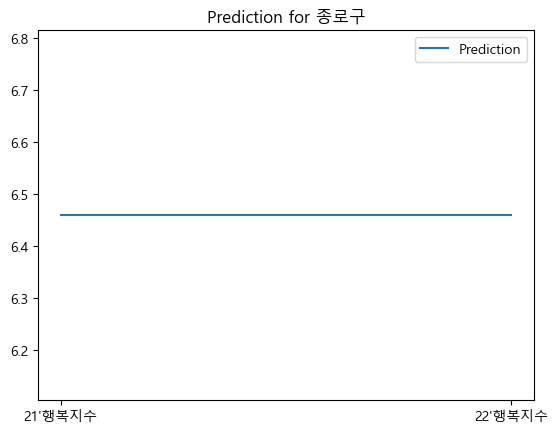

Root Mean Squared Error (RMSE) for 종로구: 0.3510697936308393


In [13]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터프레임 로드 또는 생성
# df_list[0] = ...

# 선택할 자치구 설정
selected_region = '종로구'  # 선택하고 싶은 자치구명으로 수정

# 특정 자치구 데이터 추출
selected_data = df_list[0].loc[selected_region]

# 학습 데이터와 테스트 데이터로 분할
train_data, test_data = train_test_split(selected_data, test_size=0.2, shuffle=False)

# SARIMA 모델 생성과 훈련
order = (1, 1, 1)  # ARIMA의 차수
seasonal_order = (1, 1, 1, 12)  # 계절성 차수
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# 모델로 테스트 데이터 예측
predictions = fit_model.get_forecast(steps=len(test_data))

# 예측 결과 시각화
#plt.plot(train_data.index, train_data, label='Train')
#plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions.predicted_mean, label='Prediction')
plt.title(f'Prediction for {selected_region}')
plt.legend()
plt.show()

# 모델 성능 평가 (RMSE)
rmse = mean_squared_error(test_data, predictions.predicted_mean, squared=False)
print(f'Root Mean Squared Error (RMSE) for {selected_region}: {rmse}')


In [269]:
df_list[0]

,14'지가변동평균,15'지가변동평균,16'지가변동평균,17'지가변동평균,18'지가변동평균,19'지가변동평균,20'지가변동평균,21'지가변동평균,22'지가변동평균
자치구,,,,,,,,,
종로구,2.410,1.903,2.199,3.284,5.811,4.457,4.316,5.006,3.045
중구,2.563,1.806,2.227,3.244,5.327,4.763,4.551,4.882,2.366
용산구,1.491,1.501,3.133,5.225,8.598,5.860,4.854,5.507,3.255
성동구,1.848,2.218,2.916,5.221,7.377,5.882,5.129,6.173,4.528
광진구,1.822,2.551,3.182,4.343,5.679,5.324,4.398,5.037,2.581
동대문구,1.361,2.254,2.574,3.995,6.241,5.327,4.394,5.237,2.736
중랑구,1.867,2.531,2.742,3.730,4.504,4.239,3.878,4.339,2.203
성북구,1.425,2.191,2.398,3.124,5.723,4.970,4.479,4.777,1.946
강북구,1.886,1.986,2.395,3.697,5.131,4.462,3.786,4.181,1.734


## 연도별 흐름 시각화

In [14]:
def show_plt(i=0):
    fig = plt.figure(figsize = (15,8))
    plt.plot(df_list[i].T,"D-")
    plt.legend(df_list[i].T.columns,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

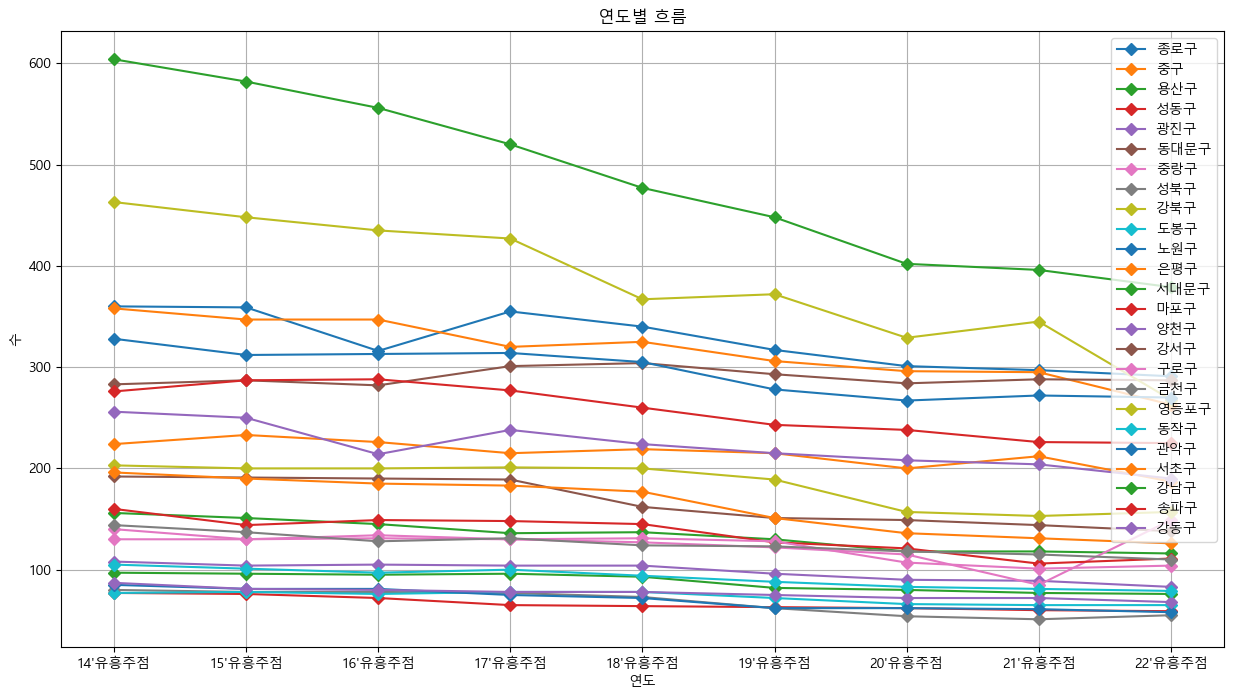

In [103]:
show_plt()

# 데이터 스케일링

In [15]:
pd.options.mode.chained_assignment = None

In [16]:
scale_col = aa.columns[3:].tolist()

In [17]:
aa[scale_col].head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,0.918144,103,165344,6914,26,1083,6.90,55.7,9.0,2.410,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,0.609444,77,136227,13677,20,985,6.56,61.2,8.6,2.563,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,0.615952,68,249914,11428,13,655,6.72,57.6,9.5,1.491,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,0.571748,110,303891,18028,16,613,6.90,64.8,9.1,1.848,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,0.563338,176,377375,22117,11,653,6.74,56.0,7.5,1.822,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [18]:
aa_ss=StandardScaler()

In [19]:
scaled_aa=aa_ss.fit_transform(aa[scale_col])

In [20]:
scaled_aa

array([[ 2.38214057, -1.07708732, -1.87259119, ...,  1.55759012,
        -0.2788587 ,  0.0544702 ],
       [-1.12356173, -1.17863546, -2.10332913, ...,  1.53996412,
        -0.30237117,  0.2835505 ],
       [-1.04965622, -1.21378674, -1.20241543, ..., -0.24026198,
         0.41929988, -0.34642031],
       ...,
       [ 0.16163921,  0.3484924 ,  1.04964297, ...,  1.72503713,
        -0.72584441, -0.06006994],
       [-0.55210875,  0.20398158,  2.08308617, ...,  0.36783505,
        -0.61773682,  0.11174028],
       [ 0.04651256,  0.19617018,  0.4944043 , ...,  0.05938004,
        -0.84402878,  0.56990086]])

In [21]:
scaled_aa_df=pd.DataFrame(scaled_aa,columns=scale_col)

In [22]:
scaled_aa_df.head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,-0.407363,1.023729,-1.006389,...,-0.504476,-0.081296,0.326689,0.078170,2.487887,0.596616,-1.024456,1.557590,-0.278859,0.054470
1,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,0.719648,0.829514,-0.899893,...,-1.685135,-1.793164,0.131153,-0.559474,0.916957,1.307100,-1.345123,1.539964,-0.302371,0.283550
2,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,-0.018032,1.266498,-1.646059,...,-0.766845,0.299119,0.815527,0.715814,0.393314,0.278123,-1.296902,-0.240262,0.419300,-0.346420
3,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,1.457328,1.072283,-1.397569,...,-1.553950,-0.651919,1.206597,1.034636,1.178779,1.797089,-0.700172,-0.936489,-0.346784,-1.090931
4,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,-0.345890,0.295423,-1.415666,...,-0.766845,0.299119,0.978473,0.795520,0.131493,0.719113,-0.893054,-0.663286,0.426515,-1.663632


In [23]:
scaled_aa_df=pd.concat([aa[["연도","자치구","발생"]],scaled_aa_df],axis=1)

In [24]:
scaled_aa_df

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,...,-0.504476,-0.081296,0.326689,0.078170,2.487887,0.596616,-1.024456,1.557590,-0.278859,0.054470
1,14,중구,5231,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,...,-1.685135,-1.793164,0.131153,-0.559474,0.916957,1.307100,-1.345123,1.539964,-0.302371,0.283550
2,14,용산구,3799,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,...,-0.766845,0.299119,0.815527,0.715814,0.393314,0.278123,-1.296902,-0.240262,0.419300,-0.346420
3,14,성동구,3582,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,...,-1.553950,-0.651919,1.206597,1.034636,1.178779,1.797089,-0.700172,-0.936489,-0.346784,-1.090931
4,14,광진구,6268,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,...,-0.766845,0.299119,0.978473,0.795520,0.131493,0.719113,-0.893054,-0.663286,0.426515,-1.663632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,22,관악구,4879,-0.105183,-0.952105,0.789109,-0.105458,0.234478,0.523746,-0.137855,...,-1.422766,-2.363787,-0.096971,-1.595645,0.655136,-0.885601,2.023539,0.764420,0.392802,0.398091
221,22,서초구,4459,-0.154515,1.942017,0.053913,-1.838180,0.707639,1.492654,0.616268,...,-0.307700,0.299119,0.489635,-0.240652,-0.392151,-0.554858,2.470333,-0.504652,-0.834076,-0.174610
222,22,강남구,6947,0.161639,0.348492,1.049643,-0.825204,1.180800,3.784590,-1.383797,...,0.151445,0.869742,0.457046,-0.001535,-0.130329,0.523118,1.689762,1.725037,-0.725844,-0.060070
223,22,송파구,5167,-0.552109,0.203982,2.083086,0.453924,0.944220,1.207392,0.944147,...,0.085853,0.299119,0.391867,0.715814,-0.130329,-1.338840,2.413071,0.367835,-0.617737,0.111740


# 원핫 인코딩

In [25]:
aa["자치구"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [26]:
ohe=OneHotEncoder()

In [27]:
gu_arr=np.array(aa["자치구"])

In [28]:
gu_arr=np.reshape(gu_arr,(-1,1))

In [29]:
gu_arr

array([['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
       ['서대문구'],
       ['마포구'],
       ['양천구'],
       ['강서구'],
       ['구로구'],
       ['금천구'],
       ['영등포구'],
       ['동작구'],
       ['관악구'],
       ['서초구'],
       ['강남구'],
       ['송파구'],
       ['강동구'],
       ['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
       ['서대문구'],
       ['마포구'],
       ['양천구'],
       ['강서구'],
       ['구로구'],
       ['금천구'],
       ['영등포구'],
       ['동작구'],
       ['관악구'],
       ['서초구'],
       ['강남구'],
       ['송파구'],
       ['강동구'],
       ['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
    

In [30]:
ohe_gu=ohe.fit_transform(gu_arr)

In [31]:
ohe_gu

<225x25 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [32]:
ohe.get_feature_names_out()

array(['x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구',
       'x0_구로구', 'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구',
       'x0_마포구', 'x0_서대문구', 'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구',
       'x0_양천구', 'x0_영등포구', 'x0_용산구', 'x0_은평구', 'x0_종로구', 'x0_중구',
       'x0_중랑구'], dtype=object)

In [33]:
type(ohe_gu)

scipy.sparse._csr.csr_matrix

In [34]:
aa.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [35]:
ohe_gu_df=pd.DataFrame(ohe_gu.toarray(),columns=ohe.get_feature_names_out())

In [36]:
ohe_gu_df.head()

,x0_강남구,x0_강동구,x0_강북구,x0_강서구,x0_관악구,x0_광진구,x0_구로구,x0_금천구,x0_노원구,x0_도봉구,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
ohe_aa_df=pd.concat([scaled_aa_df,ohe_gu_df],axis=1)

In [38]:
ohe_aa_df.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,14,종로구,5021,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14,중구,5231,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14,용산구,3799,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14,성동구,3582,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,광진구,6268,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 데이터 분할

In [39]:
x=ohe_aa_df.iloc[:,3:]
y=ohe_aa_df["발생"]

In [40]:
x.head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,-0.407363,1.023729,-1.006389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,0.719648,0.829514,-0.899893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,-0.018032,1.266498,-1.646059,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,1.457328,1.072283,-1.397569,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,-0.345890,0.295423,-1.415666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   검거율       225 non-null    float64
 1   cctv      225 non-null    float64
 2   인구        225 non-null    float64
 3   인구밀도      225 non-null    float64
 4   파출소현황     225 non-null    float64
 5   경찰관       225 non-null    float64
 6   행복지수      225 non-null    float64
 7   월간 음주율    225 non-null    float64
 8   우울감 경험률   225 non-null    float64
 9   지가변동평균    225 non-null    float64
 10  평균기온      225 non-null    float64
 11  최고기온      225 non-null    float64
 12  평균최고기온    225 non-null    float64
 13  최저기온      225 non-null    float64
 14  평균최저기온    225 non-null    float64
 15  평균풍속      225 non-null    float64
 16  최대 순간 풍속  225 non-null    float64
 17  강수량합      225 non-null    float64
 18  유흥주점      225 non-null    float64
 19  외국인 인구    225 non-null    float64
 20  평균연령      225 non-null    float6

In [42]:
y.head()

0    5021
1    5231
2    3799
3    3582
4    6268
Name: 발생, dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [44]:
y_train.head()

212    2374
33     4257
170    5261
83     3393
201    3071
Name: 발생, dtype: int64

# 다항식 추가

In [45]:
pf = PolynomialFeatures(degree=2, include_bias = False)
poly_train = pf.fit_transform(x_train)
poly_test = pf.transform(x_test)

In [46]:
poly_train.shape

(180, 1127)

In [184]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs= model.params.tolist()
coefs_se=pd.Series(coefs)

# 변수명을 리스트로 변환
X_labels= model.params.index.tolist()

# X의 1번째 컬럼부터 20번째 컬럼까지만 선택
selected_coefs_se = coefs_se[1:22]

ax = selected_coefs_se.plot(kind="bar")

ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(X_labels[1:22])  # X의 1번째 컬럼부터 20번째 컬럼까지만 라벨 설정

plt.show()


AttributeError: 'LinearRegression' object has no attribute 'params'

# 모델훈련

In [139]:
lr = LinearRegression()

In [140]:
x.head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,-0.407363,1.023729,-1.006389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,0.719648,0.829514,-0.899893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,-0.018032,1.266498,-1.646059,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,1.457328,1.072283,-1.397569,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,-0.345890,0.295423,-1.415666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
x_train.head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
212,-0.366884,-0.799783,-0.650553,0.141804,-1.421587,-0.784526,0.452328,-1.063079,1.606374,-1.222860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.259895,-1.213787,-0.532699,-0.688769,-0.475264,-1.089462,0.255600,-0.120488,0.149761,-1.301514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.283227,0.098528,0.857077,-0.044587,0.471058,0.366360,-0.760826,-1.370446,-1.015529,0.339771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.407290,-1.463751,-0.583606,-0.746282,-0.475264,-0.843546,1.108087,0.350808,0.829514,-0.110573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,-0.208700,-0.944294,-2.146454,-0.907275,0.234478,0.887702,-1.088706,-0.796695,0.392530,-1.037015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
lr.fit(x_train, y_train)

LinearRegression()

In [143]:
lr.coef_

array([ -254.01968263,    32.51262168, -2210.9825283 ,  1001.09052457,
         158.74962204,  -314.98303002,    83.6112841 ,    24.23469122,
         -23.31133225,    -7.76954762,  -222.65264605,     9.76806991,
         238.80576771,    61.54510224,    64.19526532,    49.27637864,
          51.7764684 ,   108.21000156,   444.48264547,   153.57408078,
        -690.32343342,  5698.36253662,   308.15057508,  -293.4743768 ,
        4546.56030016,  2409.30438882, -1207.64033593,  -346.65178089,
       -3646.6662865 ,  3175.34876095, -1773.02458659, -2658.62637309,
       -2733.74083108,   -35.20202294, -2344.75259776,  2323.0541905 ,
       -3256.74042458,   312.87526217,  4952.45651494, -1521.52491341,
         615.64361964, -1744.00728625,  1975.52639245, -1239.38339459,
       -3390.66146659,  -125.18586435])

In [144]:
lr.intercept_

4232.238995903475

In [145]:
lr.score(x_train, y_train)

0.9617903065969423

In [147]:
lr.score(x_test, y_test)

0.9241003079736487

In [150]:
pred = lr.predict(x_test)

In [151]:
mae = mean_absolute_error(y_test, pred)
mae

263.9648681716459

In [152]:
def calculate_rmse(y_test,pred):
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    return rmse

rmse = calculate_rmse(y_test,pred)
print("RMSE:", rmse)

RMSE: 343.96644028960355


# 2차항을 추가한 데이터로 학습한 모델

In [58]:
lr_poly = LinearRegression()

In [59]:
lr_poly.fit(poly_train, y_train)

LinearRegression()

In [60]:
lr_poly.score(poly_train, y_train)

1.0

In [61]:
lr_poly.score(poly_test, y_test)

0.7991107611239197

- 2차항을 추가하면 과적합이 발생 : 데이터의 양이 적어서 2차항 설정까지는 과함

# Ridge, Lasso model

### 규제값 시각화

In [64]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # 모델 생성
    rid = Ridge(alpha = alpha)
    
    # 훈련
    rid.fit(x_train, y_train)
    
    # 모델 성능을 저장
    train_hist.append(rid.score(x_train, y_train))
    test_hist.append(rid.score(x_test, y_test))

C:\Users\potte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


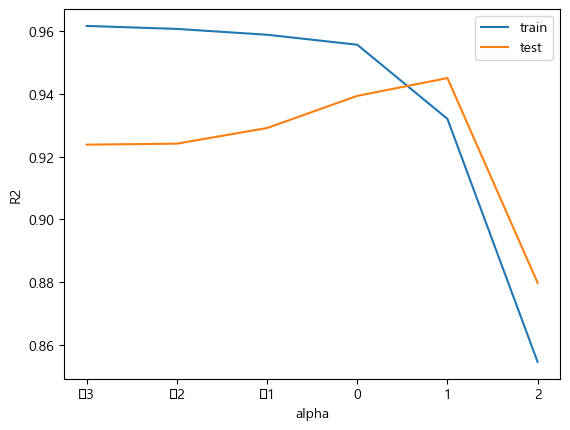

In [65]:
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)

plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels = ["train", "test"])

plt.show()

- alpha=1 주변에 가장 높은 score가 나오는 alpha값이 존재

In [66]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # 모델 생성
    las = Lasso(alpha = alpha)
    
    # 훈련
    las.fit(x_train, y_train)
    
    # 모델 성능을 저장
    train_hist.append(las.score(x_train, y_train))
    test_hist.append(las.score(x_test, y_test))

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.207e+06, tolerance: 3.191e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.083e+06, tolerance: 3.191e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


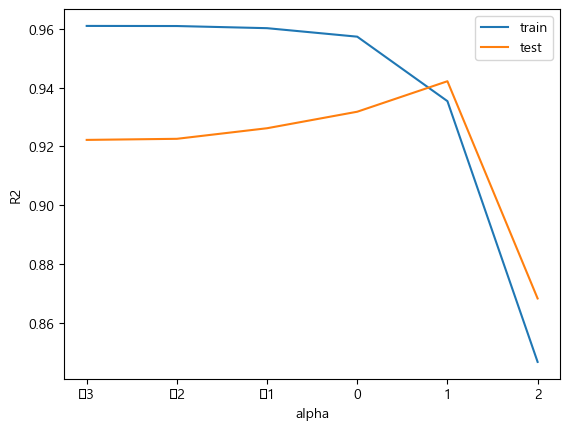

In [67]:
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)

plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels = ["train", "test"])

plt.show()

- alpha = 1 주변에서 가장 높은 스코어를 발견할 수 있음

# 릿지, 라소 규제 하이퍼 파라미터 값 설정

In [155]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Ridge 모델에 대한 랜덤 서치
ridge_params = {"alpha": uniform(0, 1)}  # alpha는 0부터 1까지의 균등 분포
ridge_rs = RandomizedSearchCV(Ridge(), ridge_params, n_iter=100, random_state=0)
ridge_rs.fit(x_train, y_train)

# Lasso 모델에 대한 랜덤 서치
lasso_params = {"alpha": uniform(0, 1)}  # alpha는 0부터 1까지의 균등 분포
lasso_rs = RandomizedSearchCV(Lasso(), lasso_params, n_iter=100, random_state=0)
lasso_rs.fit(x_train, y_train)

# 결과 출력
print("Ridge Best Parameters:", ridge_rs.best_params_)
print("Lasso Best Parameters:", lasso_rs.best_params_)


C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.938e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.644e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.789e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.354e+04, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.740e+04, tolerance: 2.485e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+04, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.334e+04, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.662e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.145e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.048e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.961e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+06, toleranc

Ridge Best Parameters: {'alpha': 0.6399210213275238}
Lasso Best Parameters: {'alpha': 0.9883738380592262}


C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.481e+06, tolerance: 2.437e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.050e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+06, toleranc

- Ridge Best Parameters: {'alpha': 0.6399210213275238}
- Lasso Best Parameters: {'alpha': 0.9883738380592262}

## 해당 하이퍼 파라미터로 스코어값 출력

In [156]:
from sklearn.metrics import r2_score

# Ridge 모델에 대한 예측 및 스코어 출력
ridge_train_predictions = ridge_rs.predict(x_train)
ridge_test_predictions = ridge_rs.predict(x_test)

ridge_train_score = r2_score(y_train, ridge_train_predictions)
ridge_test_score = r2_score(y_test, ridge_test_predictions)

print("Ridge Train Score:", ridge_train_score)
print("Ridge Test Score:", ridge_test_score)

# Lasso 모델에 대한 예측 및 스코어 출력
lasso_train_predictions = lasso_rs.predict(x_train)
lasso_test_predictions = lasso_rs.predict(x_test)

lasso_train_score = r2_score(y_train, lasso_train_predictions)
lasso_test_score = r2_score(y_test, lasso_test_predictions)

print("Lasso Train Score:", lasso_train_score)
print("Lasso Test Score:", lasso_test_score)


Ridge Train Score: 0.9568334442332669
Ridge Test Score: 0.936878825261396
Lasso Train Score: 0.9573661118680461
Lasso Test Score: 0.9317714881510364


- 기존의 score
    - 0.9617903065969423
    - 0.9241003079736487
와 비교했을 때 Lasso 규제가 Test에서 조금 더 높은 점수 향상을 보임

# 교차검증

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 212 to 172
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   검거율       180 non-null    float64
 1   cctv      180 non-null    float64
 2   인구        180 non-null    float64
 3   인구밀도      180 non-null    float64
 4   파출소현황     180 non-null    float64
 5   경찰관       180 non-null    float64
 6   행복지수      180 non-null    float64
 7   월간 음주율    180 non-null    float64
 8   우울감 경험률   180 non-null    float64
 9   지가변동평균    180 non-null    float64
 10  평균기온      180 non-null    float64
 11  최고기온      180 non-null    float64
 12  평균최고기온    180 non-null    float64
 13  최저기온      180 non-null    float64
 14  평균최저기온    180 non-null    float64
 15  평균풍속      180 non-null    float64
 16  최대 순간 풍속  180 non-null    float64
 17  강수량합      180 non-null    float64
 18  유흥주점      180 non-null    float64
 19  외국인 인구    180 non-null    float64
 20  평균연령      180 non-null    floa

In [69]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 180 entries, 212 to 172
Series name: 발생
Non-Null Count  Dtype
--------------  -----
180 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [70]:
len(x_train)

180

In [71]:
len(y_train)

180

In [72]:
import pandas as pd
from sklearn.model_selection import (train_test_split, cross_validate, StratifiedKFold, GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from scipy.stats import uniform, randint

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [73]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [74]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_sub, y_sub)
print(dt.score(x_sub, y_sub))
print(dt.score(x_val, y_val))

1.0
0.0


- 회귀모델에서 교차검증은 큰 의미를 지니지 못함

# 모델 최적화

C:\Users\potte\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\potte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


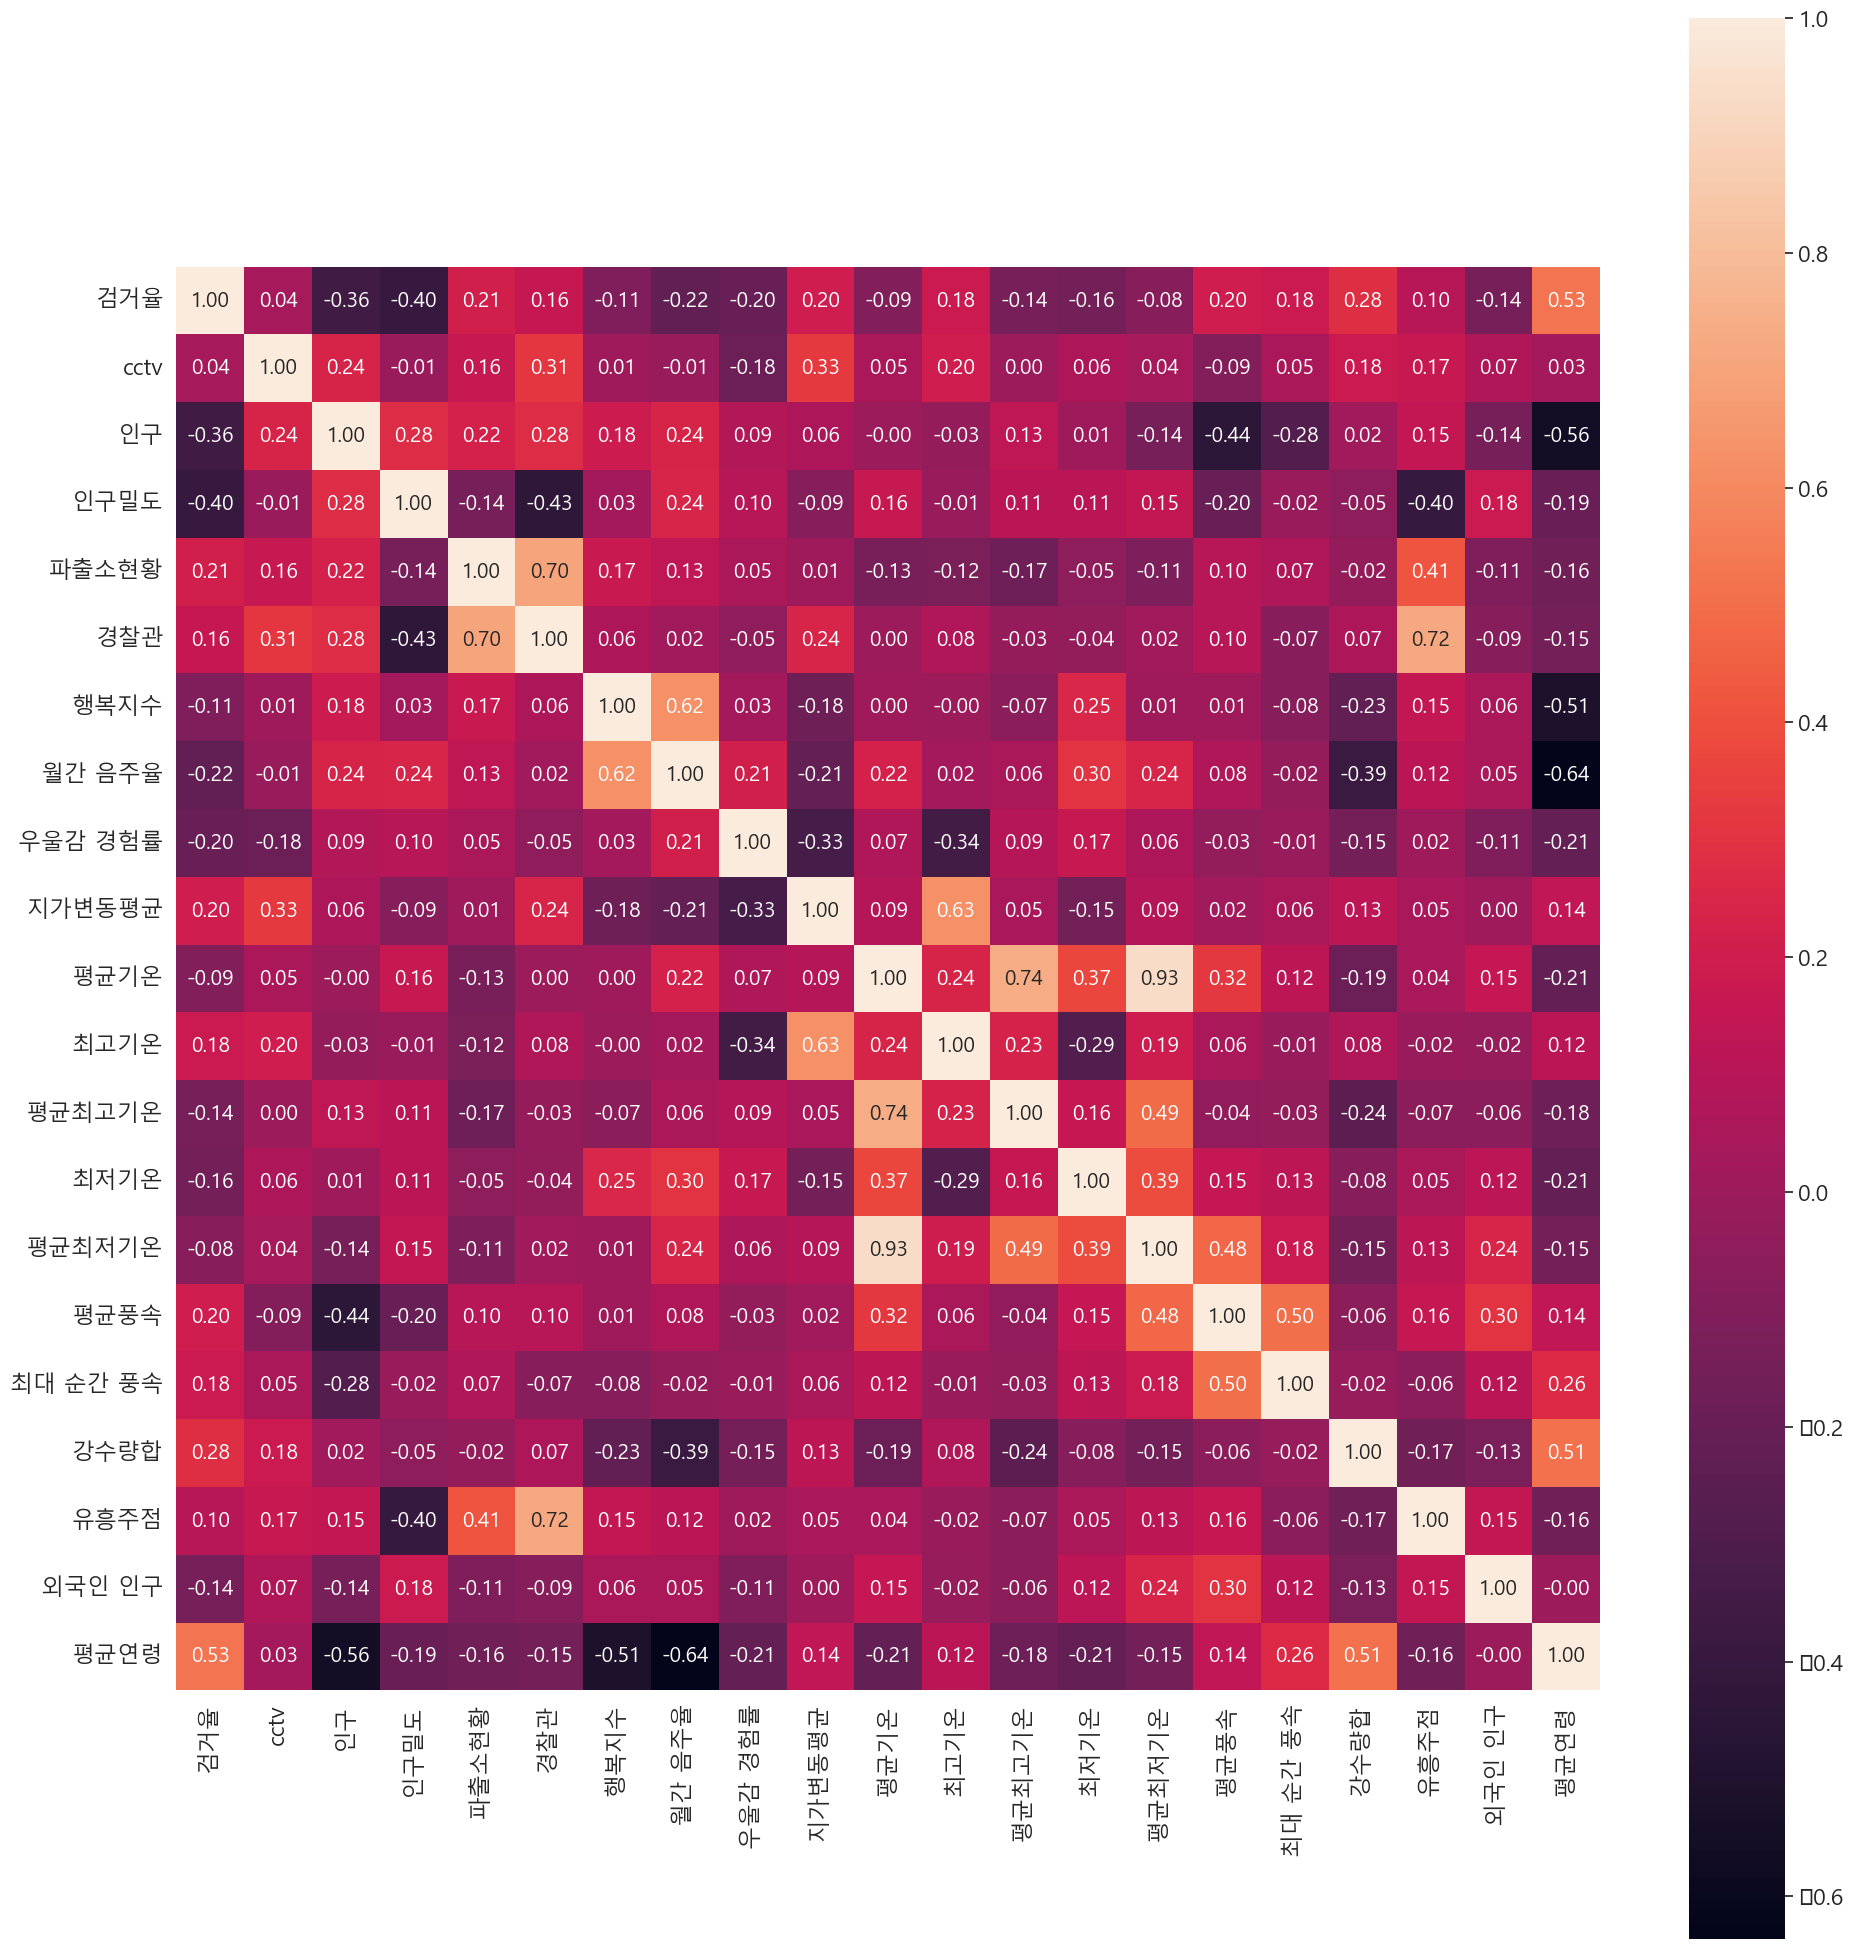

In [75]:
plt.figure(figsize = (20, 20))
corr = scaled_aa_df[scale_col].corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                 annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

- 높은 연관성을 지닌 피처쌍이 많이 발견되지는 않음

# 변수중 유의미한 변수를 RFECV로 선정

In [161]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# x: 전체 데이터셋, y: 종속 변수
# x: ...

# 모델 선택 (선형 회귀 모델)
model = LinearRegression()

# RFECV 모델 생성
rfecv = RFECV(estimator=model, step=1, cv=5) 

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# RFECV 모델을 훈련 데이터에 적용
rfecv.fit(x_train, y_train)

# 선택된 변수의 개수 출력
print("Optimal number of features: {}".format(rfecv.n_features_))

# 선택된 변수의 인덱스 출력
print("Selected features indices: {}".format(rfecv.support_))

# 선택된 변수의 이름 출력
selected_feature_names = x.columns[rfecv.support_]
print("Selected feature names: {}".format(selected_feature_names))

# 선택된 변수 중 False인 변수의 이름 출력
false_feature_names = x.columns[~rfecv.support_]
print("False feature names: {}".format(false_feature_names))

Optimal number of features: 40
Selected features indices: [ True False  True  True  True  True  True False False False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False]
Selected feature names: Index(['검거율', '인구', '인구밀도', '파출소현황', '경찰관', '행복지수', '평균기온', '평균최고기온', '최저기온',
       '평균최저기온', '평균풍속', '최대 순간 풍속', '강수량합', '유흥주점', '외국인 인구', '평균연령',
       'x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구', 'x0_구로구',
       'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구', 'x0_마포구', 'x0_서대문구',
       'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구', 'x0_양천구', 'x0_영등포구', 'x0_용산구',
       'x0_은평구', 'x0_종로구', 'x0_중구'],
      dtype='object')
False feature names: Index(['cctv', '월간 음주율', '우울감 경험률', '지가변동평균', '최고기온', 'x0_중랑구'], dtype='object')


In [82]:
x_train

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
212,-0.366884,-0.799783,-0.650553,0.141804,-1.421587,-0.784526,0.452328,-1.063079,1.606374,-1.222860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.259895,-1.213787,-0.532699,-0.688769,-0.475264,-1.089462,0.255600,-0.120488,0.149761,-1.301514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.283227,0.098528,0.857077,-0.044587,0.471058,0.366360,-0.760826,-1.370446,-1.015529,0.339771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.407290,-1.463751,-0.583606,-0.746282,-0.475264,-0.843546,1.108087,0.350808,0.829514,-0.110573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,-0.208700,-0.944294,-2.146454,-0.907275,0.234478,0.887702,-1.088706,-0.796695,0.392530,-1.037015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.541965,-0.963822,-1.164853,0.442170,-1.185006,-1.355051,0.747420,1.088488,-1.209744,-1.005693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.061738,-0.670895,-1.242220,0.284325,-1.185006,-1.246848,-1.908405,-1.288482,2.091912,0.271558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.808022,0.625797,-1.169869,0.431675,-1.185006,-1.256685,1.173663,-0.571292,-0.724206,0.581301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,-0.490412,1.746732,1.427301,-0.572065,1.653962,2.589439,0.780208,0.596701,0.878068,-0.036096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# 선택된 변수들로 데이터 필터링
selected_x_train = x_train[selected_feature_names]
selected_x_test = x_test[selected_feature_names]

# 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(selected_x_train, y_train)


LinearRegression()

In [159]:
lr.score(selected_x_train, y_train)

0.9611006767714448

In [162]:
lr.score(selected_x_test,y_test)

0.9224488568162165

In [77]:
import statsmodels.api as sm

In [78]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     91.65
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          4.88e-102
Time:                        14:59:30   Log-Likelihood:                -1578.4
No. Observations:                 225   AIC:                             3249.
Df Residuals:                     179   BIC:                             3406.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4067.8974     19.364    210.073      0.000    4029.686    4106.109
검거율         -252.8753     61.243     -4.129      0.000    -373.726    -132.024
cctv          22.9094     27.682      0.828      0.409     -31.716      77.535
인구         -2207.7640    787.580     -2.803      0.006   -3761.900    -653.628
인구밀도        1393.2520    752.479      1.852      0.066     -91.619    2878.123
파출소현황          5.2934    145.171      0.036      0.971    -281.173     291.760
경찰관         -260.8543    250.343     -1.042      0.299    -754.857     233.149
행복지수          75.8213     31.362      2.418      0.017      13.934     137.709
월간 음주율        48.7955     41.014      1.190      0.236     -32.138     129.729
우울감 경험률      -43.8554     26.781     -1.638      0.103     -96.702       8.991
지가변동평균        -8.6100     40.973     -0.210      0.834     -89.463      72.243
평균기온         -76.0117    278.549     -0.273      0.785    -625.674     473.650
최고기온         -14.3486     39.363     -0.365      0.716     -92.024      63.327
평균최고기온       209.7692    108.357      1.936      0.054      -4.051     423.590
최저기온          67.2715     31.596      2.129      0.035       4.923     129.620
평균최저기온       -27.9864    239.447     -0.117      0.907    -500.488     444.516
평균풍속          53.0610     84.076      0.631      0.529    -112.847     218.969
최대 순간 풍속      33.7877     32.020      1.055      0.293     -29.397      96.973
강수량합         112.6805     47.821      2.356      0.020      18.316     207.045
유흥주점         601.1282    152.915      3.931      0.000     299.380     902.876
외국인 인구        74.6570    140.353      0.532      0.595    -202.303     351.617
평균연령        -627.8024    100.280     -6.260      0.000    -825.686    -429.919
x0_강남구      5664.9362   1791.600      3.162      0.002    2129.562    9200.310
x0_강동구       310.5979    293.628      1.058      0.292    -268.820     890.016
x0_강북구       -67.4870    394.818     -0.171      0.864    -846.584     711.610
x0_강서구      4536.9362   1632.379      2.779      0.006    1315.754    7758.118
x0_관악구      2629.3387    762.409      3.449      0.001    1124.872    4133.806
x0_광진구     -1528.6717    862.339     -1.773      0.078   -3230.330     172.986
x0_구로구      -204.3832    601.680     -0.340      0.734   -1391.681     982.915
x0_금천구     -3631.9607   1269.080     -2.862      0.005   -6136.243   -1127.679
x0_노원구      3644.7332   1305.426      2.792      0.006    1068.729    6220.737
x0_도봉구     -1674.3512    669.422     -2.501      0.013   -2995.325    -353.378
x0_동대문구    -2989.9121   1506.617     -1.985      0.049   -5962.928     -16.897
x0_동작구     -2965.1220   1184.709     -2.503      0.013   -5302.914    -627.330
x0_마포구       392.5370    326.050      1.204      0.230    -250.860    1035.934
x0_서대문구    -2103.2714    696.010     -3.022      0.003   -3476.712    -729.831
x0

In [137]:
# 변수마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,9.2,검거율
2,1.9,cctv
3,1529.4,인구
4,1396.1,인구밀도
5,52.0,파출소현황
6,154.5,경찰관
7,2.4,행복지수
8,4.1,월간 음주율
9,1.8,우울감 경험률


# 회귀계수 시각화

C:\Users\potte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


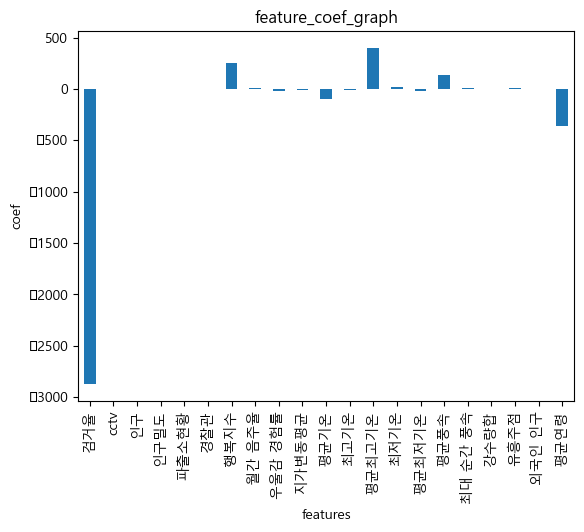

In [154]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs= model.params.tolist()
coefs_se=pd.Series(coefs)

# 변수명을 리스트로 변환
X_labels= model.params.index.tolist()

# X의 1번째 컬럼부터 20번째 컬럼까지만 선택
selected_coefs_se = coefs_se[1:22]

ax = selected_coefs_se.plot(kind="bar")

ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(X_labels[1:22])  # X의 1번째 컬럼부터 20번째 컬럼까지만 라벨 설정

plt.show()


- 검거율, 행복지수, 평균최고기온, 평균연령 등이 발생에 영향을 미치는 정도가 큰 것을 확인

## 변수제거 1
- 제거된 변수 : 평균최저기온
- p값이 가장 높기 때문

In [268]:
new_X = X.drop("평균최저기온", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     94.25
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.02e-103
Time:                        01:59:05   Log-Likelihood:                -1578.4
No. Observations:                 225   AIC:                             3247.
Df Residuals:                     180   BIC:                             3401.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.477e+04   3487.583      4.235      0.000    7886.441    2.17e+04
검거율        -2867.8600    692.799     -4.140      0.000   -4234.913   -1500.807
cctv           0.0899      0.108      0.835      0.405      -0.123       0.303
인구            -0.0175      0.006     -2.827      0.005      -0.030      -0.005
인구밀도           0.2939      0.157      1.871      0.063      -0.016       0.604
파출소현황          1.7020     34.035      0.050      0.960     -65.457      68.861
경찰관           -1.2481      1.191     -1.048      0.296      -3.599       1.103
행복지수         248.6130    102.549      2.424      0.016      46.260     450.966
월간 음주율         9.9844      8.380      1.191      0.235      -6.552      26.521
우울감 경험률      -21.3168     12.966     -1.644      0.102     -46.901       4.268
지가변동평균        -5.8701     28.422     -0.207      0.837     -61.953      50.213
평균기온        -132.4071    185.134     -0.715      0.475    -497.720     232.905
최고기온          -9.3890     25.748     -0.365      0.716     -60.195      41.417
평균최고기온       411.7100    174.583      2.358      0.019      67.218     756.202
최저기온          22.1143     10.138      2.181      0.030       2.109      42.120
평균풍속         142.4500    217.455      0.655      0.513    -286.640     571.540
최대 순간 풍속       8.2262      7.811      1.053      0.294      -7.186      23.639
강수량합           0.3355      0.139      2.407      0.017       0.060       0.610
유흥주점           5.2939      1.344      3.940      0.000       2.643       7.945
외국인 인구         0.0093      0.017      0.532      0.595      -0.025       0.044
평균연령        -359.2275     57.210     -6.279      0.000    -472.116    -246.339
x0_강남구      6081.6956   1784.893      3.407      0.001    2559.690    9603.702
x0_강동구       748.2053    335.642      2.229      0.027      85.906    1410.504
x0_강북구       367.2974    338.872      1.084      0.280    -301.376    1035.971
x0_강서구      4979.0755   1615.645      3.082      0.002    1791.035    8167.116
x0_관악구      3064.1902    778.194      3.938      0.000    1528.633    4599.747
x0_광진구     -1100.7838    892.524     -1.233      0.219   -2861.940     660.373
x0_구로구       222.3408    670.689      0.332      0.741   -1101.084    1545.766
x0_금천구     -3208.9283   1275.767     -2.515      0.013   -5726.311    -691.546
x0_노원구      4111.7456   1252.987      3.282      0.001    1639.314    6584.177
x0_도봉구     -1226.5342    634.151     -1.934      0.055   -2477.861      24.792
x0_동대문구    -2578.9979   1548.907     -1.665      0.098   -5635.349     477.353
x0_동작구     -2536.6769   1235.346     -2.053      0.041   -4974.299     -99.055
x0_마포구       809.7020    288.896      2.803      0.006     239.643    1379.761
x0_서대문구    -1675.7421    702.387     -2.386      0.018   -3061.713    -289.771
x0_서초구      3642.0009   1527.672      2.384      0.018     627.552    6656.450
x0

In [269]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,9.2,검거율
2,1.9,cctv
3,1521.4,인구
4,1388.0,인구밀도
5,51.3,파출소현황
6,145.4,경찰관
7,2.4,행복지수
8,4.1,월간 음주율
9,1.8,우울감 경험률


- 기온과 관련된 변수들의 다중공선성이 낮아진 것을 확인 가능

## 변수제거 2
- 제거된 변수 : 평균최저기온, 파출소 현황

In [270]:
new_X = new_X.drop("파출소현황", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     96.98
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.07e-104
Time:                        01:59:05   Log-Likelihood:                -1578.4
No. Observations:                 225   AIC:                             3245.
Df Residuals:                     181   BIC:                             3395.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.479e+04   3445.258      4.293      0.000    7994.071    2.16e+04
검거율        -2863.1457    684.461     -4.183      0.000   -4213.695   -1512.596
cctv           0.0902      0.107      0.840      0.402      -0.122       0.302
인구            -0.0175      0.006     -2.840      0.005      -0.030      -0.005
인구밀도           0.2941      0.157      1.879      0.062      -0.015       0.603
경찰관           -1.2559      1.178     -1.066      0.288      -3.580       1.068
행복지수         248.9801    102.004      2.441      0.016      47.711     450.249
월간 음주율         9.9602      8.343      1.194      0.234      -6.502      26.423
우울감 경험률      -21.3089     12.929     -1.648      0.101     -46.820       4.202
지가변동평균        -5.8442     28.339     -0.206      0.837     -61.761      50.073
평균기온        -133.2658    183.828     -0.725      0.469    -495.986     229.455
최고기온          -9.5143     25.555     -0.372      0.710     -59.938      40.909
평균최고기온       412.5514    173.291      2.381      0.018      70.622     754.481
최저기온          22.0785     10.085      2.189      0.030       2.179      41.978
평균풍속         142.2589    216.822      0.656      0.513    -285.565     570.082
최대 순간 풍속       8.1958      7.766      1.055      0.293      -7.127      23.519
강수량합           0.3359      0.139      2.422      0.016       0.062       0.610
유흥주점           5.3034      1.326      3.998      0.000       2.686       7.921
외국인 인구         0.0092      0.017      0.531      0.596      -0.025       0.043
평균연령        -359.3958     56.953     -6.310      0.000    -471.773    -247.018
x0_강남구      6092.0512   1767.947      3.446      0.001    2603.613    9580.489
x0_강동구       744.8641    328.017      2.271      0.024      97.636    1392.092
x0_강북구       365.2431    335.445      1.089      0.278    -296.642    1027.128
x0_강서구      4967.4913   1594.539      3.115      0.002    1821.216    8113.767
x0_관악구      3065.6511    775.500      3.953      0.000    1535.468    4595.834
x0_광진구     -1109.5526    872.715     -1.271      0.205   -2831.556     612.450
x0_구로구       223.8085    668.198      0.335      0.738   -1094.651    1542.268
x0_금천구     -3213.9353   1268.322     -2.534      0.012   -5716.535    -711.336
x0_노원구      4109.5017   1248.728      3.291      0.001    1645.566    6573.437
x0_도봉구     -1239.2172    579.619     -2.138      0.034   -2382.897     -95.538
x0_동대문구    -2572.3159   1538.874     -1.672      0.096   -5608.757     464.125
x0_동작구     -2539.0059   1231.061     -2.062      0.041   -4968.083    -109.929
x0_마포구       810.8167    287.240      2.823      0.005     244.047    1377.586
x0_서대문구    -1682.8462    685.972     -2.453      0.015   -3036.376    -329.317
x0_서초구      3650.2851   1514.472      2.410      0.017     661.994    6638.576
x0_성동구     -2583.2251    795.068     -3.249      0.001   -4152.020   -1014.430
x0

In [271]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,9.1,검거율
2,1.9,cctv
3,1511.9,인구
4,1386.3,인구밀도
5,143.0,경찰관
6,2.4,행복지수
7,4.1,월간 음주율
8,1.8,우울감 경험률
9,4.1,지가변동평균


## 변수제거 3
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균

In [272]:
new_X = new_X.drop("지가변동평균", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     99.81
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.14e-105
Time:                        01:59:05   Log-Likelihood:                -1578.5
No. Observations:                 225   AIC:                             3243.
Df Residuals:                     182   BIC:                             3390.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.484e+04   3428.123      4.329      0.000    8076.768    2.16e+04
검거율        -2902.9467    654.958     -4.432      0.000   -4195.235   -1610.659
cctv           0.0896      0.107      0.837      0.404      -0.122       0.301
인구            -0.0177      0.006     -2.919      0.004      -0.030      -0.006
인구밀도           0.2967      0.156      1.906      0.058      -0.010       0.604
경찰관           -1.2679      1.173     -1.081      0.281      -3.583       1.047
행복지수         252.2474    100.500      2.510      0.013      53.952     450.543
월간 음주율        10.3445      8.111      1.275      0.204      -5.659      26.348
우울감 경험률      -21.2963     12.895     -1.652      0.100     -46.739       4.146
평균기온        -135.1184    183.124     -0.738      0.462    -496.438     226.201
최고기온         -12.4222     21.256     -0.584      0.560     -54.363      29.519
평균최고기온       421.4909    167.339      2.519      0.013      91.316     751.665
최저기온          21.7903      9.962      2.187      0.030       2.135      41.445
평균풍속         147.7666    214.604      0.689      0.492    -275.665     571.198
최대 순간 풍속       7.9647      7.664      1.039      0.300      -7.157      23.086
강수량합           0.3477      0.126      2.756      0.006       0.099       0.597
유흥주점           5.3352      1.314      4.060      0.000       2.743       7.928
외국인 인구         0.0086      0.017      0.508      0.612      -0.025       0.042
평균연령        -361.6747     55.724     -6.491      0.000    -471.622    -251.727
x0_강남구      6117.6708   1758.932      3.478      0.001    2647.150    9588.192
x0_강동구       747.9464    326.813      2.289      0.023     103.117    1392.775
x0_강북구       368.4278    334.207      1.102      0.272    -290.990    1027.846
x0_강서구      5012.6584   1575.266      3.182      0.002    1904.527    8120.790
x0_관악구      3090.1389    764.337      4.043      0.000    1582.038    4598.240
x0_광진구     -1125.3335    867.063     -1.298      0.196   -2836.123     585.456
x0_구로구       234.2156    664.535      0.352      0.725   -1076.967    1545.398
x0_금천구     -3237.9473   1259.640     -2.571      0.011   -5723.323    -752.572
x0_노원구      4144.8448   1233.653      3.360      0.001    1710.743    6578.946
x0_도봉구     -1245.5951    577.269     -2.158      0.032   -2384.595    -106.595
x0_동대문구    -2594.0930   1531.203     -1.694      0.092   -5615.286     427.100
x0_동작구     -2559.2600   1223.905     -2.091      0.038   -4974.127    -144.393
x0_마포구       799.9917    281.659      2.840      0.005     244.254    1355.729
x0_서대문구    -1694.8797    681.685     -2.486      0.014   -3039.902    -349.858
x0_서초구      3667.2786   1508.246      2.431      0.016     691.383    6643.174
x0_성동구     -2608.6751    783.364     -3.330      0.001   -4154.317   -1063.033
x0_성북구      1350.3113    373.681      3.614      0.000     613.007    2087.615
x0

In [273]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.3,검거율
2,1.9,cctv
3,1472.6,인구
4,1377.7,인구밀도
5,142.6,경찰관
6,2.4,행복지수
7,3.9,월간 음주율
8,1.8,우울감 경험률
9,51.6,평균기온


## 변수제거 4
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온

In [274]:
new_X = new_X.drop("최고기온", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     102.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.96e-106
Time:                        01:59:05   Log-Likelihood:                -1578.7
No. Observations:                 225   AIC:                             3241.
Df Residuals:                     183   BIC:                             3385.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.501e+04   3409.311      4.403      0.000    8286.158    2.17e+04
검거율        -2907.5895    653.731     -4.448      0.000   -4197.408   -1617.771
cctv           0.0845      0.106      0.794      0.428      -0.126       0.295
인구            -0.0180      0.006     -2.971      0.003      -0.030      -0.006
인구밀도           0.2940      0.155      1.893      0.060      -0.012       0.600
경찰관           -1.3377      1.165     -1.148      0.252      -3.636       0.961
행복지수         246.3516     99.813      2.468      0.015      49.420     443.283
월간 음주율         9.1328      7.827      1.167      0.245      -6.311      24.576
우울감 경험률      -19.5303     12.513     -1.561      0.120     -44.219       5.159
평균기온        -116.2469    179.930     -0.646      0.519    -471.251     238.757
평균최고기온       411.7762    166.212      2.477      0.014      83.838     739.714
최저기온          24.8696      8.439      2.947      0.004       8.220      41.519
평균풍속         161.7681    212.878      0.760      0.448    -258.243     581.780
최대 순간 풍속       7.6190      7.627      0.999      0.319      -7.430      22.668
강수량합           0.3634      0.123      2.953      0.004       0.121       0.606
유흥주점           5.2977      1.310      4.044      0.000       2.713       7.883
외국인 인구         0.0084      0.017      0.495      0.621      -0.025       0.042
평균연령        -370.7279     53.431     -6.939      0.000    -476.147    -265.309
x0_강남구      6179.5509   1752.580      3.526      0.001    2721.689    9637.413
x0_강동구       760.9297    325.470      2.338      0.020     118.774    1403.085
x0_강북구       329.5661    326.934      1.008      0.315    -315.479     974.611
x0_강서구      5053.0157   1570.917      3.217      0.002    1953.577    8152.454
x0_관악구      3160.8260    753.346      4.196      0.000    1674.465    4647.187
x0_광진구     -1150.2091    864.459     -1.331      0.185   -2855.796     555.378
x0_구로구       258.3112    662.060      0.390      0.697   -1047.941    1564.564
x0_금천구     -3290.9088   1254.113     -2.624      0.009   -5765.289    -816.528
x0_노원구      4214.4854   1225.673      3.439      0.001    1796.218    6632.753
x0_도봉구     -1241.9190    576.195     -2.155      0.032   -2378.759    -105.079
x0_동대문구    -2577.5798   1528.186     -1.687      0.093   -5592.708     437.549
x0_동작구     -2547.9394   1221.548     -2.086      0.038   -4958.068    -137.811
x0_마포구       778.7142    278.793      2.793      0.006     228.652    1328.776
x0_서대문구    -1699.4032    680.414     -2.498      0.013   -3041.868    -356.939
x0_서초구      3639.4595   1504.780      2.419      0.017     670.511    6608.408
x0_성동구     -2664.2867    776.162     -3.433      0.001   -4195.664   -1132.910
x0_성북구      1394.7911    365.189      3.819      0.000     674.269    2115.313
x0_송파구      5379.1000   1403.059      3.834      0.000    2610.848    8147.352
x0

In [275]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.3,검거율
2,1.9,cctv
3,1465.7,인구
4,1376.5,인구밀도
5,141.1,경찰관
6,2.3,행복지수
7,3.7,월간 음주율
8,1.7,우울감 경험률
9,50.0,평균기온


## 변수제거 5
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구

In [276]:
new_X = new_X.drop("외국인 인구", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          6.50e-107
Time:                        01:59:05   Log-Likelihood:                -1578.8
No. Observations:                 225   AIC:                             3240.
Df Residuals:                     184   BIC:                             3380.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.495e+04   3399.808      4.397      0.000    8240.520    2.17e+04
검거율        -2867.1030    647.256     -4.430      0.000   -4144.100   -1590.106
cctv           0.0844      0.106      0.795      0.428      -0.125       0.294
인구            -0.0185      0.006     -3.122      0.002      -0.030      -0.007
인구밀도           0.3103      0.151      2.049      0.042       0.012       0.609
경찰관           -1.3710      1.161     -1.181      0.239      -3.661       0.919
행복지수         250.9244     99.180      2.530      0.012      55.249     446.600
월간 음주율         8.6786      7.757      1.119      0.265      -6.626      23.984
우울감 경험률      -20.9001     12.178     -1.716      0.088     -44.927       3.126
평균기온        -114.0097    179.504     -0.635      0.526    -468.160     240.140
평균최고기온       410.6103    165.854      2.476      0.014      83.391     737.830
최저기온          25.6144      8.286      3.091      0.002       9.266      41.963
평균풍속         154.3232    211.909      0.728      0.467    -263.762     572.408
최대 순간 풍속       7.8459      7.598      1.033      0.303      -7.144      22.836
강수량합           0.3587      0.122      2.930      0.004       0.117       0.600
유흥주점           5.4977      1.244      4.421      0.000       3.044       7.951
평균연령        -368.9295     53.197     -6.935      0.000    -473.884    -263.974
x0_강남구      6234.6575   1745.444      3.572      0.000    2791.001    9678.314
x0_강동구       707.0706    306.091      2.310      0.022     103.171    1310.970
x0_강북구       271.9927    304.892      0.892      0.374    -329.541     873.526
x0_강서구      5151.2925   1555.104      3.313      0.001    2083.164    8219.421
x0_관악구      3262.5745    723.238      4.511      0.000    1835.668    4689.481
x0_광진구     -1188.4196    859.232     -1.383      0.168   -2883.634     506.794
x0_구로구       385.4749    608.870      0.633      0.527    -815.790    1586.740
x0_금천구     -3340.5821   1247.519     -2.678      0.008   -5801.863    -879.301
x0_노원구      4291.6500   1213.210      3.537      0.001    1898.058    6685.241
x0_도봉구     -1324.6121    550.284     -2.407      0.017   -2410.290    -238.934
x0_동대문구    -2702.3545   1504.132     -1.797      0.074   -5669.918     265.209
x0_동작구     -2644.9099   1203.242     -2.198      0.029   -5018.834    -270.985
x0_마포구       809.6716    271.121      2.986      0.003     274.765    1344.578
x0_서대문구    -1738.5959    674.397     -2.578      0.011   -3069.142    -408.050
x0_서초구      3752.3749   1484.313      2.528      0.012     823.913    6680.837
x0_성동구     -2737.6709    760.290     -3.601      0.000   -4237.678   -1237.664
x0_성북구      1430.7437    357.149      4.006      0.000     726.109    2135.378
x0_송파구      5452.5636   1392.312      3.916      0.000    2705.615    8199.513
x0_양천구     -1878.7933   1192.044     -1.576      0.117   -4230.625     473.038
x0

In [277]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.2,검거율
2,1.9,cctv
3,1415.7,인구
4,1314.3,인구밀도
5,140.7,경찰관
6,2.3,행복지수
7,3.6,월간 음주율
8,1.6,우울감 경험률
9,50.0,평균기온


## 변수제거 6
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온

In [278]:
new_X = new_X.drop("평균기온", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          7.55e-108
Time:                        01:59:05   Log-Likelihood:                -1579.1
No. Observations:                 225   AIC:                             3238.
Df Residuals:                     185   BIC:                             3375.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.486e+04   3391.736      4.382      0.000    8172.422    2.16e+04
검거율        -2974.0703    623.952     -4.767      0.000   -4205.047   -1743.094
cctv           0.0834      0.106      0.786      0.433      -0.126       0.293
인구            -0.0189      0.006     -3.218      0.002      -0.031      -0.007
인구밀도           0.3177      0.151      2.108      0.036       0.020       0.615
경찰관           -1.0333      1.030     -1.003      0.317      -3.066       0.999
행복지수         253.2148     98.954      2.559      0.011      57.991     448.438
월간 음주율         9.0070      7.728      1.166      0.245      -6.239      24.253
우울감 경험률      -20.1630     12.103     -1.666      0.097     -44.041       3.715
평균최고기온       315.3848     70.800      4.455      0.000     175.707     455.063
최저기온          26.0887      8.239      3.166      0.002       9.834      42.344
평균풍속         142.5941    210.763      0.677      0.500    -273.213     558.401
최대 순간 풍속       7.5145      7.568      0.993      0.322      -7.416      22.445
강수량합           0.3546      0.122      2.905      0.004       0.114       0.595
유흥주점           5.6052      1.230      4.557      0.000       3.179       8.032
평균연령        -366.2277     52.941     -6.918      0.000    -470.674    -261.781
x0_강남구      6033.1468   1713.596      3.521      0.001    2652.444    9413.850
x0_강동구       749.8399    298.110      2.515      0.013     161.707    1337.973
x0_강북구       308.4139    298.968      1.032      0.304    -281.410     898.238
x0_강서구      5210.3894   1549.813      3.362      0.001    2152.809    8267.970
x0_관악구      3333.8982    713.314      4.674      0.000    1926.622    4741.174
x0_광진구     -1213.5232    856.938     -1.416      0.158   -2904.150     477.103
x0_구로구       409.5411    606.710      0.675      0.501    -787.418    1606.500
x0_금천구     -3378.7812   1244.058     -2.716      0.007   -5833.145    -924.417
x0_노원구      4529.4746   1152.118      3.931      0.000    2256.496    6802.453
x0_도봉구     -1176.3637    497.525     -2.364      0.019   -2157.916    -194.812
x0_동대문구    -2800.0883   1493.826     -1.874      0.062   -5747.212     147.036
x0_동작구     -2604.9739   1199.659     -2.171      0.031   -4971.744    -238.203
x0_마포구       823.5064    269.809      3.052      0.003     291.209    1355.804
x0_서대문구    -1670.0654    664.636     -2.513      0.013   -2981.305    -358.825
x0_서초구      3736.3769   1481.705      2.522      0.013     813.167    6659.587
x0_성동구     -2794.4405    753.800     -3.707      0.000   -4281.589   -1307.292
x0_성북구      1390.4788    350.911      3.962      0.000     698.178    2082.780
x0_송파구      5418.0886   1389.009      3.901      0.000    2677.755    8158.422
x0_양천구     -1935.5315   1186.774     -1.631      0.105   -4276.881     405.818
x0_영등포구     1196.7397    405.886      2.948      0.004     395.980    1997.499
x0

In [279]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,7.6,검거율
2,1.9,cctv
3,1398.1,인구
4,1306.4,인구밀도
5,111.2,경찰관
6,2.3,행복지수
7,3.6,월간 음주율
8,1.6,우울감 경험률
9,3.5,평균최고기온


## 변수제거 7
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속

In [280]:
new_X = new_X.drop("평균풍속", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     111.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          8.88e-109
Time:                        01:59:05   Log-Likelihood:                -1579.4
No. Observations:                 225   AIC:                             3237.
Df Residuals:                     186   BIC:                             3370.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.5e+04   3380.974      4.436      0.000    8328.295    2.17e+04
검거율        -3018.7514    619.542     -4.873      0.000   -4240.985   -1796.518
cctv           0.0832      0.106      0.786      0.433      -0.126       0.292
인구            -0.0189      0.006     -3.208      0.002      -0.030      -0.007
인구밀도           0.3221      0.150      2.142      0.033       0.025       0.619
경찰관           -1.1107      1.022     -1.086      0.279      -3.127       0.906
행복지수         250.7359     98.742      2.539      0.012      55.938     445.534
월간 음주율         9.3823      7.697      1.219      0.224      -5.801      24.566
우울감 경험률      -19.4037     12.033     -1.612      0.109     -43.143       4.336
평균최고기온       309.0759     70.080      4.410      0.000     170.821     447.330
최저기온          25.1764      8.116      3.102      0.002       9.165      41.188
최대 순간 풍속       8.4999      7.415      1.146      0.253      -6.129      23.129
강수량합           0.3700      0.120      3.090      0.002       0.134       0.606
유흥주점           5.7000      1.220      4.671      0.000       3.293       8.107
평균연령        -363.3923     52.698     -6.896      0.000    -467.355    -259.429
x0_강남구      6051.5951   1710.880      3.537      0.001    2676.371    9426.819
x0_강동구       686.7552    282.740      2.429      0.016     128.966    1244.544
x0_강북구       346.8778    293.084      1.184      0.238    -231.319     925.074
x0_강서구      5208.7527   1547.551      3.366      0.001    2155.744    8261.761
x0_관악구      3304.0361    710.909      4.648      0.000    1901.555    4706.517
x0_광진구     -1231.0979    855.294     -1.439      0.152   -2918.422     456.227
x0_구로구       443.5630    603.740      0.735      0.463    -747.495    1634.621
x0_금천구     -3364.7597   1242.070     -2.709      0.007   -5815.117    -914.403
x0_노원구      4470.6714   1147.159      3.897      0.000    2207.556    6733.786
x0_도봉구     -1255.8488    482.750     -2.601      0.010   -2208.217    -303.480
x0_동대문구    -2820.6949   1491.337     -1.891      0.060   -5762.804     121.414
x0_동작구     -2678.9512   1192.923     -2.246      0.026   -5032.349    -325.553
x0_마포구       965.3721    169.542      5.694      0.000     630.899    1299.845
x0_서대문구    -1710.9600    660.916     -2.589      0.010   -3014.815    -407.105
x0_서초구      3776.6470   1478.349      2.555      0.011     860.160    6693.134
x0_성동구     -2739.2862    748.285     -3.661      0.000   -4215.503   -1263.069
x0_성북구      1384.3857    350.283      3.952      0.000     693.347    2075.425
x0_송파구      5393.4976   1386.507      3.890      0.000    2658.196    8128.800
x0_양천구     -2008.0760   1180.196     -1.701      0.091   -4336.366     320.214
x0_영등포구     1211.5740    404.702      2.994      0.003     413.178    2009.970
x0_용산구      -724.6140    460.873     -1.572      0.118   -1633.825     184.597
x0

In [281]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,7.6,검거율
2,1.9,cctv
3,1397.4,인구
4,1304.1,인구밀도
5,109.8,경찰관
6,2.3,행복지수
7,3.6,월간 음주율
8,1.6,우울감 경험률
9,3.4,평균최고기온


## 변수제거 8
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv

In [282]:
new_X = new_X.drop("cctv", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.11e-109
Time:                        01:59:06   Log-Likelihood:                -1579.7
No. Observations:                 225   AIC:                             3235.
Df Residuals:                     187   BIC:                             3365.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.441e+04   3293.720      4.375      0.000    7912.481    2.09e+04
검거율        -2939.2078    610.593     -4.814      0.000   -4143.743   -1734.672
인구            -0.0185      0.006     -3.163      0.002      -0.030      -0.007
인구밀도           0.3236      0.150      2.154      0.032       0.027       0.620
경찰관           -1.0896      1.021     -1.067      0.287      -3.103       0.924
행복지수         248.2743     98.591      2.518      0.013      53.780     442.768
월간 음주율        10.0153      7.646      1.310      0.192      -5.069      25.100
우울감 경험률      -21.0530     11.837     -1.779      0.077     -44.404       2.298
평균최고기온       310.4630     69.986      4.436      0.000     172.399     448.527
최저기온          26.0195      8.037      3.238      0.001      10.165      41.874
최대 순간 풍속       9.3799      7.323      1.281      0.202      -5.066      23.826
강수량합           0.3654      0.119      3.058      0.003       0.130       0.601
유흥주점           5.7871      1.214      4.767      0.000       3.392       8.182
평균연령        -354.8675     51.517     -6.888      0.000    -456.496    -253.239
x0_강남구      5991.7751   1707.437      3.509      0.001    2623.460    9360.090
x0_강동구       644.5031    277.297      2.324      0.021      97.471    1191.535
x0_강북구       329.7477    291.973      1.129      0.260    -246.237     905.733
x0_강서구      5119.0213   1541.754      3.320      0.001    2077.556    8160.487
x0_관악구      3255.1551    707.458      4.601      0.000    1859.531    4650.779
x0_광진구     -1224.5369    854.379     -1.433      0.153   -2909.996     460.922
x0_구로구       413.2870    601.893      0.687      0.493    -774.086    1600.660
x0_금천구     -3345.5884   1240.560     -2.697      0.008   -5792.881    -898.296
x0_노원구      4412.9718   1143.636      3.859      0.000    2156.886    6669.057
x0_도봉구     -1266.0007    482.083     -2.626      0.009   -2217.021    -314.981
x0_동대문구    -2863.1773   1488.832     -1.923      0.056   -5800.242      73.887
x0_동작구     -2701.2615   1191.365     -2.267      0.025   -5051.504    -351.020
x0_마포구       954.5658    168.811      5.655      0.000     621.547    1287.584
x0_서대문구    -1703.3478    660.169     -2.580      0.011   -3005.684    -401.012
x0_서초구      3788.6360   1476.758      2.566      0.011     875.390    6701.882
x0_성동구     -2717.2327    746.994     -3.638      0.000   -4190.851   -1243.615
x0_성북구      1358.3405    348.355      3.899      0.000     671.129    2045.552
x0_송파구      5281.4593   1377.747      3.833      0.000    2563.534    7999.384
x0_양천구     -2041.9749   1178.201     -1.733      0.085   -4366.248     282.298
x0_영등포구     1180.9199    402.406      2.935      0.004     387.082    1974.758
x0_용산구      -694.9107    458.851     -1.514      0.132   -1600.100     210.279
x0_은평구      2840.7224    682.960      4.159      0.000    1493.427    4188.018
x0

In [283]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,7.4,검거율
2,1390.1,인구
3,1303.8,인구밀도
4,109.7,경찰관
5,2.3,행복지수
6,3.5,월간 음주율
7,1.5,우울감 경험률
8,3.4,평균최고기온
9,1.5,최저기온


# 변수제거 9
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관

In [284]:
new_X = new_X.drop("경찰관", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     118.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.79e-110
Time:                        01:59:06   Log-Likelihood:                -1580.4
No. Observations:                 225   AIC:                             3235.
Df Residuals:                     188   BIC:                             3361.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.423e+04   3290.374      4.323      0.000    7734.346    2.07e+04
검거율        -3171.9341    570.542     -5.560      0.000   -4297.421   -2046.448
인구            -0.0170      0.006     -2.993      0.003      -0.028      -0.006
인구밀도           0.2866      0.146      1.960      0.051      -0.002       0.575
행복지수         253.3139     98.515      2.571      0.011      58.978     447.650
월간 음주율         8.3101      7.480      1.111      0.268      -6.446      23.066
우울감 경험률      -18.3367     11.564     -1.586      0.115     -41.149       4.476
평균최고기온       304.1892     69.765      4.360      0.000     166.566     441.812
최저기온          27.1751      7.967      3.411      0.001      11.460      42.890
최대 순간 풍속       8.5170      7.281      1.170      0.244      -5.846      22.880
강수량합           0.3498      0.119      2.949      0.004       0.116       0.584
유흥주점           6.3488      1.094      5.801      0.000       4.190       8.508
평균연령        -364.5091     50.737     -7.184      0.000    -464.597    -264.421
x0_강남구      4740.9717   1242.198      3.817      0.000    2290.535    7191.409
x0_강동구       666.2464    276.650      2.408      0.017     120.510    1211.983
x0_강북구       537.4714    217.726      2.469      0.014     107.972     966.971
x0_강서구      4568.5410   1453.461      3.143      0.002    1701.353    7435.729
x0_관악구      2962.1176    652.249      4.541      0.000    1675.451    4248.784
x0_광진구      -858.6079    782.858     -1.097      0.274   -2402.922     685.706
x0_구로구       639.1684    563.666      1.134      0.258    -472.755    1751.092
x0_금천구     -2719.8144   1093.668     -2.487      0.014   -4877.252    -562.377
x0_노원구      4207.5638   1127.743      3.731      0.000    1982.908    6432.220
x0_도봉구      -825.9411    249.899     -3.305      0.001   -1318.907    -332.975
x0_동대문구    -2448.8748   1437.869     -1.703      0.090   -5285.305     387.555
x0_동작구     -2222.0590   1103.930     -2.013      0.046   -4399.741     -44.377
x0_마포구       909.8195    163.582      5.562      0.000     587.127    1232.512
x0_서대문구    -1336.5110    563.848     -2.370      0.019   -2448.793    -224.229
x0_서초구      3147.3025   1349.477      2.332      0.021     485.241    5809.364
x0_성동구     -2269.2628    618.155     -3.671      0.000   -3488.673   -1049.852
x0_성북구      1262.4141    336.686      3.750      0.000     598.247    1926.581
x0_송파구      4679.7746   1257.596      3.721      0.000    2198.961    7160.588
x0_양천구     -1670.2864   1125.973     -1.483      0.140   -3891.451     550.878
x0_영등포구      865.7606    273.480      3.166      0.002     326.277    1405.244
x0_용산구      -521.9009    429.423     -1.215      0.226   -1369.008     325.206
x0_은평구      2576.7373    636.834      4.046      0.000    1320.479    3832.995
x0_종로구       -94.4559    801.159     -0.118      0.906   -1674.872    1485.960
x0

In [285]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,6.4,검거율
2,1309.5,인구
3,1234.5,인구밀도
4,2.3,행복지수
5,3.4,월간 음주율
6,1.4,우울감 경험률
7,3.4,평균최고기온
8,1.5,최저기온
9,2.2,최대 순간 풍속


# 변수제거 9
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율

In [286]:
new_X = new_X.drop("월간 음주율", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     121.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          2.96e-111
Time:                        01:59:06   Log-Likelihood:                -1581.2
No. Observations:                 225   AIC:                             3234.
Df Residuals:                     189   BIC:                             3357.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.548e+04   3091.719      5.008      0.000    9383.116    2.16e+04
검거율        -3002.8793    550.213     -5.458      0.000   -4088.227   -1917.531
인구            -0.0176      0.006     -3.109      0.002      -0.029      -0.006
인구밀도           0.2838      0.146      1.940      0.054      -0.005       0.572
행복지수         293.4460     91.709      3.200      0.002     112.542     474.350
우울감 경험률      -17.0949     11.517     -1.484      0.139     -39.814       5.624
평균최고기온       306.3003     69.782      4.389      0.000     168.648     443.952
최저기온          28.1796      7.920      3.558      0.000      12.557      43.803
최대 순간 풍속       8.6862      7.284      1.193      0.235      -5.682      23.054
강수량합           0.3526      0.119      2.971      0.003       0.119       0.587
유흥주점           6.4143      1.093      5.866      0.000       4.257       8.571
평균연령        -387.6741     46.283     -8.376      0.000    -478.972    -296.377
x0_강남구      4824.4798   1240.689      3.889      0.000    2377.103    7271.857
x0_강동구       730.6977    270.665      2.700      0.008     196.784    1264.611
x0_강북구       554.3136    217.332      2.551      0.012     125.606     983.021
x0_강서구      4683.0167   1450.701      3.228      0.001    1821.371    7544.663
x0_관악구      3065.7893    645.938      4.746      0.000    1791.616    4339.963
x0_광진구      -818.0334    782.489     -1.045      0.297   -2361.568     725.502
x0_구로구       734.1429    557.490      1.317      0.189    -365.559    1833.845
x0_금천구     -2732.2542   1094.287     -2.497      0.013   -4890.840    -573.668
x0_노원구      4323.9720   1123.559      3.848      0.000    2107.645    6540.299
x0_도봉구      -778.2142    246.331     -3.159      0.002   -1264.125    -292.304
x0_동대문구    -2370.1508   1437.011     -1.649      0.101   -5204.791     464.489
x0_동작구     -2149.0983   1102.657     -1.949      0.053   -4324.195      25.998
x0_마포구       943.2988    160.882      5.863      0.000     625.944    1260.654
x0_서대문구    -1329.0159    564.157     -2.356      0.020   -2441.869    -216.163
x0_서초구      3152.1520   1350.305      2.334      0.021     488.547    5815.757
x0_성동구     -2252.1368    618.345     -3.642      0.000   -3471.881   -1032.393
x0_성북구      1357.7472    325.767      4.168      0.000     715.141    2000.354
x0_송파구      4899.7358   1242.680      3.943      0.000    2448.431    7351.041
x0_양천구     -1551.9725   1121.619     -1.384      0.168   -3764.472     660.527
x0_영등포구      917.9788    269.577      3.405      0.001     386.213    1449.745
x0_용산구      -580.3112    426.456     -1.361      0.175   -1421.536     260.913
x0_은평구      2665.8439    632.153      4.217      0.000    1418.862    3912.826
x0_종로구      -256.5659    788.245     -0.325      0.745   -1811.454    1298.322
x0_중구      -2851.8133   1099.322     -2.594      0.010   -5020.330    -683.297
x0

In [287]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,6.0,검거율
2,1298.0,인구
3,1234.1,인구밀도
4,2.0,행복지수
5,1.4,우울감 경험률
6,3.4,평균최고기온
7,1.5,최저기온
8,2.2,최대 순간 풍속
9,3.9,강수량합


# 변수제거 9
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율,최대 순간 풍속

In [288]:
new_X = new_X.drop("최대 순간 풍속", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     124.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.31e-112
Time:                        01:59:06   Log-Likelihood:                -1582.0
No. Observations:                 225   AIC:                             3234.
Df Residuals:                     190   BIC:                             3354.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.518e+04   3084.553      4.920      0.000    9092.591    2.13e+04
검거율        -3032.5210    550.262     -5.511      0.000   -4117.928   -1947.114
인구            -0.0172      0.006     -3.046      0.003      -0.028      -0.006
인구밀도           0.2828      0.146      1.931      0.055      -0.006       0.572
행복지수         294.5944     91.805      3.209      0.002     113.506     475.683
우울감 경험률      -16.0058     11.494     -1.393      0.165     -38.677       6.666
평균최고기온       305.1641     69.853      4.369      0.000     167.377     442.952
최저기온          29.0363      7.896      3.677      0.000      13.461      44.612
강수량합           0.3338      0.118      2.835      0.005       0.102       0.566
유흥주점           6.4322      1.095      5.877      0.000       4.273       8.591
평균연령        -378.4187     45.678     -8.284      0.000    -468.520    -288.317
x0_강남구      4763.1448   1240.999      3.838      0.000    2315.240    7211.050
x0_강동구       711.0668    270.464      2.629      0.009     177.568    1244.565
x0_강북구       585.3616    216.006      2.710      0.007     159.283    1011.440
x0_강서구      4588.2575   1450.132      3.164      0.002    1727.832    7448.683
x0_관악구      2998.0054    644.146      4.654      0.000    1727.409    4268.602
x0_광진구      -832.5120    783.264     -1.063      0.289   -2377.522     712.498
x0_구로구       752.8826    557.887      1.350      0.179    -347.566    1853.331
x0_금천구     -2711.2429   1095.360     -2.475      0.014   -4871.872    -550.614
x0_노원구      4257.4051   1123.418      3.790      0.000    2041.432    6473.378
x0_도봉구      -772.7726    246.562     -3.134      0.002   -1259.123    -286.422
x0_동대문구    -2331.8215   1438.246     -1.621      0.107   -5168.803     505.160
x0_동작구     -2170.6368   1103.733     -1.967      0.051   -4347.782       6.509
x0_마포구       980.7946    157.955      6.209      0.000     669.225    1292.365
x0_서대문구    -1338.6577    564.725     -2.370      0.019   -2452.594    -224.722
x0_서초구      3094.8241   1350.947      2.291      0.023     430.043    5759.606
x0_성동구     -2189.3534    616.784     -3.550      0.000   -3405.976    -972.730
x0_성북구      1358.3515    326.128      4.165      0.000     715.054    2001.649
x0_송파구      4771.3120   1239.380      3.850      0.000    2326.600    7216.024
x0_양천구     -1598.7468   1122.177     -1.425      0.156   -3812.273     614.779
x0_영등포구      889.8005    268.837      3.310      0.001     359.511    1420.090
x0_용산구      -544.9758    425.898     -1.280      0.202   -1385.071     295.119
x0_은평구      2577.8619    628.530      4.101      0.000    1338.068    3817.656
x0_종로구      -178.7635    786.412     -0.227      0.820   -1729.984    1372.457
x0_중구      -2786.6141   1099.180     -2.535      0.012   -4954.779    -618.450
x0_중랑구       303.9868    719.273      0.423      0.673   -1114.800    1722.774
==

In [289]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,6.0,검거율
2,1294.2,인구
3,1234.1,인구밀도
4,2.0,행복지수
5,1.4,우울감 경험률
6,3.4,평균최고기온
7,1.5,최저기온
8,3.9,강수량합
9,39.1,유흥주점


# 변수제거 9
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율,최대 순간 풍속, 우울감 경험률

In [290]:
new_X = new_X.drop("우울감 경험률", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     127.7
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.21e-112
Time:                        01:59:06   Log-Likelihood:                -1583.1
No. Observations:                 225   AIC:                             3234.
Df Residuals:                     191   BIC:                             3350.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e+04   3044.553      4.738      0.000    8421.091    2.04e+04
검거율        -2920.9094    545.730     -5.352      0.000   -3997.342   -1844.477
인구            -0.0165      0.006     -2.924      0.004      -0.028      -0.005
인구밀도           0.2829      0.147      1.928      0.055      -0.007       0.572
행복지수         308.8935     91.453      3.378      0.001     128.505     489.282
평균최고기온       291.5235     69.333      4.205      0.000     154.767     428.280
최저기온          27.2814      7.814      3.491      0.001      11.869      42.694
강수량합           0.3200      0.118      2.721      0.007       0.088       0.552
유흥주점           6.3245      1.095      5.778      0.000       4.166       8.483
평균연령        -367.4676     45.107     -8.147      0.000    -456.439    -278.496
x0_강남구      4679.1629   1242.577      3.766      0.000    2228.228    7130.098
x0_강동구       638.8877    266.103      2.401      0.017     114.009    1163.767
x0_강북구       585.4721    216.537      2.704      0.007     158.362    1012.582
x0_강서구      4447.8951   1450.177      3.067      0.002    1587.476    7308.314
x0_관악구      2899.0628    641.788      4.517      0.000    1633.160    4164.965
x0_광진구      -852.7472    785.052     -1.086      0.279   -2401.233     695.739
x0_구로구       704.3070    558.163      1.262      0.209    -396.648    1805.262
x0_금천구     -2660.5889   1097.445     -2.424      0.016   -4825.257    -495.921
x0_노원구      4131.0217   1122.496      3.680      0.000    1916.941    6345.102
x0_도봉구      -785.9723    246.985     -3.182      0.002   -1273.140    -298.804
x0_동대문구    -2329.5824   1441.777     -1.616      0.108   -5173.433     514.269
x0_동작구     -2210.4885   1106.072     -1.999      0.047   -4392.174     -28.803
x0_마포구       973.7017    158.260      6.153      0.000     661.539    1285.864
x0_서대문구    -1330.5018    566.081     -2.350      0.020   -2447.076    -213.928
x0_서초구      3065.1282   1354.096      2.264      0.025     394.225    5736.032
x0_성동구     -2150.5451    617.667     -3.482      0.001   -3368.870    -932.221
x0_성북구      1251.5092    317.754      3.939      0.000     624.752    1878.266
x0_송파구      4574.4815   1234.318      3.706      0.000    2139.836    7009.127
x0_양천구     -1650.2609   1124.322     -1.468      0.144   -3867.943     567.421
x0_영등포구      893.2419    269.486      3.315      0.001     361.690    1424.793
x0_용산구      -435.5285    419.611     -1.038      0.301   -1263.195     392.138
x0_은평구      2457.2179    624.060      3.937      0.000    1226.283    3688.152
x0_종로구       -68.3911    784.330     -0.087      0.931   -1615.452    1478.669
x0_중구      -2636.5267   1096.570     -2.404      0.017   -4799.470    -473.584
x0_중랑구       236.4009    719.396      0.329      0.743   -1182.581    1655.383
==============================================================================
Om

In [291]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,5.8,검거율
2,1283.5,인구
3,1234.1,인구밀도
4,2.0,행복지수
5,3.4,평균최고기온
6,1.5,최저기온
7,3.8,강수량합
8,38.9,유흥주점
9,15.7,평균연령


# 변수제거 9
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율,최대 순간 풍속, 우울감 경험률, 인구밀도

In [292]:
new_X = new_X.drop("인구밀도", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          6.55e-113
Time:                        01:59:06   Log-Likelihood:                -1585.3
No. Observations:                 225   AIC:                             3237.
Df Residuals:                     192   BIC:                             3349.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.712e+04   2723.905      6.285      0.000    1.17e+04    2.25e+04
검거율        -2796.1429    545.697     -5.124      0.000   -3872.473   -1719.813
인구            -0.0074      0.003     -2.376      0.018      -0.014      -0.001
행복지수         313.1623     92.071      3.401      0.001     131.562     494.763
평균최고기온       278.6033     69.494      4.009      0.000     141.533     415.674
최저기온          28.1944      7.855      3.590      0.000      12.702      43.687
강수량합           0.3039      0.118      2.572      0.011       0.071       0.537
유흥주점           5.6657      1.047      5.411      0.000       3.600       7.731
평균연령        -396.9361     42.736     -9.288      0.000    -481.228    -312.644
x0_강남구      2571.1567    594.049      4.328      0.000    1399.456    3742.857
x0_강동구       569.3362    265.503      2.144      0.033      45.658    1093.014
x0_강북구       399.7296    195.280      2.047      0.042      14.561     784.898
x0_강서구      1959.3579    665.117      2.946      0.004     647.484    3271.232
x0_관악구      2014.1846    451.651      4.460      0.000    1123.349    2905.020
x0_광진구       635.0957    144.166      4.405      0.000     350.743     919.449
x0_구로구      1669.8782    247.924      6.735      0.000    1180.874    2158.882
x0_금천구      -675.1220    381.311     -1.771      0.078   -1427.219      76.975
x0_노원구      2262.3383    569.785      3.971      0.000    1138.496    3386.180
x0_도봉구      -436.2061    168.735     -2.585      0.010    -769.018    -103.394
x0_동대문구      438.7389    127.605      3.438      0.001     187.051     690.427
x0_동작구      -108.9531    187.601     -0.581      0.562    -478.977     261.071
x0_마포구       807.3095    133.579      6.044      0.000     543.839    1070.780
x0_서대문구     -311.3992    203.703     -1.529      0.128    -713.182      90.383
x0_서초구       484.0251    202.584      2.389      0.018      84.450     883.601
x0_성동구     -1075.9071    267.739     -4.018      0.000   -1603.994    -547.820
x0_성북구      1083.2482    307.681      3.521      0.001     476.380    1690.117
x0_송파구      2909.0742    887.704      3.277      0.001    1158.171    4659.978
x0_양천구       429.6841    317.988      1.351      0.178    -197.514    1056.883
x0_영등포구      841.6235    270.042      3.117      0.002     308.994    1374.253
x0_용산구      -674.8822    403.641     -1.672      0.096   -1471.022     121.257
x0_은평구      1520.1522    394.052      3.858      0.000     742.926    2297.379
x0_종로구      -696.1861    718.536     -0.969      0.334   -2113.423     721.051
x0_중구      -1070.6621    741.754     -1.443      0.151   -2533.695     392.371
x0_중랑구      1574.5456    189.959      8.289      0.000    1199.872    1949.220
==============================================================================
Omnibus:                        5.874   Durbin-Watson:                   1.592
Pr

In [293]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,5.7,검거율
2,386.3,인구
3,2.0,행복지수
4,3.3,평균최고기온
5,1.4,최저기온
6,3.8,강수량합
7,35.1,유흥주점
8,13.9,평균연령
9,inf,x0_강남구


# 변수제거 10
- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율,최대 순간 풍속, 우울감 경험률, 인구밀도, 인구

In [294]:
new_X = new_X.drop("인구", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     130.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          8.99e-113
Time:                        01:59:06   Log-Likelihood:                -1588.6
No. Observations:                 225   AIC:                             3241.
Df Residuals:                     193   BIC:                             3350.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.218e+04   1780.620      6.840      0.000    8667.634    1.57e+04
검거율        -2993.1795    545.811     -5.484      0.000   -4069.701   -1916.658
행복지수         313.0385     93.172      3.360      0.001     129.272     496.805
평균최고기온       266.3818     70.133      3.798      0.000     128.056     404.707
최저기온          26.0307      7.895      3.297      0.001      10.459      41.602
강수량합           0.2782      0.119      2.337      0.020       0.043       0.513
유흥주점           5.3831      1.053      5.113      0.000       3.307       7.460
평균연령        -336.2440     34.672     -9.698      0.000    -404.629    -267.859
x0_강남구      1424.7281    350.690      4.063      0.000     733.051    2116.405
x0_강동구        19.8094    131.953      0.150      0.881    -240.446     280.065
x0_강북구       683.1339    156.470      4.366      0.000     374.523     991.745
x0_강서구       429.6626    169.037      2.542      0.012      96.265     763.060
x0_관악구      1017.0538    168.953      6.020      0.000     683.823    1350.284
x0_광진구       728.2981    140.387      5.188      0.000     451.409    1005.187
x0_구로구      1171.6150    133.835      8.754      0.000     907.648    1435.582
x0_금천구       175.5904    132.746      1.323      0.187     -86.230     437.410
x0_노원구       963.8984    163.248      5.904      0.000     641.919    1285.878
x0_도봉구      -279.1327    157.103     -1.777      0.077    -588.993      30.727
x0_동대문구      482.2159    127.797      3.773      0.000     230.158     734.274
x0_동작구      -358.3501    157.349     -2.277      0.024    -668.695     -48.005
x0_마포구       770.1001    134.245      5.737      0.000     505.325    1034.875
x0_서대문구       18.3462    150.898      0.122      0.903    -279.275     315.968
x0_서초구       145.7830    145.860      0.999      0.319    -141.902     433.468
x0_성동구      -558.8268    157.829     -3.541      0.001    -870.117    -247.536
x0_성북구       453.9056    158.434      2.865      0.005     141.422     766.389
x0_송파구       835.9069    165.386      5.054      0.000     509.711    1162.103
x0_양천구      -218.0422    165.671     -1.316      0.190    -544.800     108.715
x0_영등포구      660.3816    262.144      2.519      0.013     143.347    1177.416
x0_용산구       226.9772    138.964      1.633      0.104     -47.106     501.060
x0_은평구       641.8613    138.161      4.646      0.000     369.362     914.361
x0_종로구       888.1316    270.946      3.278      0.001     353.736    1422.527
x0_중구        591.7655    249.262      2.374      0.019     100.137    1083.394
x0_중랑구      1264.7941    139.817      9.046      0.000     989.028    1540.560
==============================================================================
Omnibus:                        7.873   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.886
Sk

In [295]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\potte\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,5.6,검거율
2,2.0,행복지수
3,3.3,평균최고기온
4,1.4,최저기온
5,3.8,강수량합
6,34.7,유흥주점
7,8.9,평균연령
8,inf,x0_강남구
9,inf,x0_강동구


- 제거된 변수 : 평균최저기온, 파출소 현황, 지가변동평균, 최고기온, 외국인 인구, 평균기온, 평균 풍속, cctv, 경찰관, 월간음주율,최대 순간 풍속, 우울감 경험률, 인구밀도, 인구

# 하나하나 빼는 걸로는 최적의 점수를 찾기 힘들어 RFECV를 통한 최적의 변수 찾기

In [163]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# x: 전체 데이터셋, y: 종속 변수
# x: ...

# 모델 선택 (선형 회귀 모델)
model = LinearRegression()

# RFECV 모델 생성
rfecv = RFECV(estimator=model, step=1, cv=5)  # cv는 교차 검증의 폴드 수입니다.

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# RFECV 모델을 훈련 데이터에 적용
rfecv.fit(x_train, y_train)

# 선택된 변수의 인덱스
selected_feature_indices = rfecv.support_

# 선택된 변수들로 업데이트된 x 추출
selected_x = x.iloc[:, selected_feature_indices]

# 선택된 변수들의 이름
selected_feature_names = selected_x.columns

# 선택된 변수 중 False인 변수의 이름 출력
false_feature_names = x.columns[~rfecv.support_]
print("False feature names: {}".format(false_feature_names))


False feature names: Index(['cctv', '월간 음주율', '우울감 경험률', '지가변동평균', '최고기온', 'x0_중랑구'], dtype='object')


In [164]:
# 선택된 변수들로 데이터 필터링
selected_x_train = x_train[selected_feature_names]
selected_x_test = x_test[selected_feature_names]

# 모델 생성 및 훈련
fin_lr = LinearRegression()
fin_lr.fit(selected_x_train, y_train)



LinearRegression()

In [165]:
fin_lr.score(selected_x_train,y_train)

0.9611006767714448

In [166]:
fin_lr.score(selected_x_test,y_test)

0.9224488568162165

In [167]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Ridge 모델에 대한 랜덤 서치
ridge_params = {"alpha": uniform(0, 1)}  # alpha는 0부터 1까지의 균등 분포
ridge_rs = RandomizedSearchCV(Ridge(), ridge_params, n_iter=100, random_state=0)
ridge_rs.fit(selected_x_train, y_train)

# Lasso 모델에 대한 랜덤 서치
lasso_params = {"alpha": uniform(0, 1)}  # alpha는 0부터 1까지의 균등 분포
lasso_rs = RandomizedSearchCV(Lasso(), lasso_params, n_iter=100, random_state=0)
lasso_rs.fit(selected_x_train, y_train)

# 결과 출력
print("Ridge Best Parameters:", ridge_rs.best_params_)
print("Lasso Best Parameters:", lasso_rs.best_params_)

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.455e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.377e+05, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.430e+05, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+04, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.154e+06, tolerance: 2.437e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.815e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.051e+06, toleranc

C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 2.656e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.252e+05, toleranc

Ridge Best Parameters: {'alpha': 0.004695476192547066}
Lasso Best Parameters: {'alpha': 0.4236547993389047}


C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+06, tolerance: 2.437e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+06, tolerance: 2.508e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\potte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.480e+06, toleranc

In [168]:
from sklearn.metrics import r2_score

# Ridge 모델에 대한 예측 및 스코어 출력
ridge_train_predictions = ridge_rs.predict(selected_x_train)
ridge_test_predictions = ridge_rs.predict(selected_x_test)

ridge_train_score = r2_score(y_train, ridge_train_predictions)
ridge_test_score = r2_score(y_test, ridge_test_predictions)

print("Ridge Train Score:", ridge_train_score)
print("Ridge Test Score:", ridge_test_score)

# Lasso 모델에 대한 예측 및 스코어 출력
lasso_train_predictions = lasso_rs.predict(selected_x_train)
lasso_test_predictions = lasso_rs.predict(selected_x_test)

lasso_train_score = r2_score(y_train, lasso_train_predictions)
lasso_test_score = r2_score(y_test, lasso_test_predictions)

print("Lasso Train Score:", lasso_train_score)
print("Lasso Test Score:", lasso_test_score)


Ridge Train Score: 0.960732162086566
Ridge Test Score: 0.9232064926478439
Lasso Train Score: 0.9566614250458392
Lasso Test Score: 0.9289215665179014


- 기존의 모델 점수
    - 0.9354710035995657
    - 0.8947838032617299

- 변수들을 제거한 후에는 규제가 큰 의미를 가지지 못함

# 최종 시각화

In [177]:
aa_pred=lasso_rs.predict(selected_x)

In [178]:
aa["예측발생"]=aa_pred

In [179]:
aa.head()

,연도,자치구,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,...,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,발생,예측발생
0,14,종로구,0.918144,103,165344,6914,26,1083,6.90,55.7,...,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5,5021,4877.545566
1,14,중구,0.609444,77,136227,13677,20,985,6.56,61.2,...,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9,5231,4967.089058
2,14,용산구,0.615952,68,249914,11428,13,655,6.72,57.6,...,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8,3799,4285.994988
3,14,성동구,0.571748,110,303891,18028,16,613,6.90,64.8,...,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5,3582,3639.932349
4,14,광진구,0.563338,176,377375,22117,11,653,6.74,56.0,...,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5,6268,5645.381860


In [118]:
aa.columns

Index(['연도', '자치구', '발생', '검거율', 'cctv', '인구', '인구밀도', '파출소현황', '경찰관', '행복지수',
       '월간 음주율', '우울감 경험률', '지가변동평균', '평균기온', '최고기온', '평균최고기온', '최저기온',
       '평균최저기온', '평균풍속', '최대 순간 풍속', '강수량합', '유흥주점', '외국인 인구', '평균연령', '예측발생'],
      dtype='object')

In [119]:
aa=aa[['연도', '자치구',  '검거율', 'cctv', '인구', '인구밀도', '파출소현황', '경찰관', '행복지수',
       '월간 음주율', '우울감 경험률', '지가변동평균', '평균기온', '최고기온', '평균최고기온', '최저기온',
       '평균최저기온', '평균풍속', '최대 순간 풍속', '강수량합', '유흥주점', '외국인 인구', '평균연령','발생', '예측발생']]

In [172]:
aa.head()

,연도,자치구,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,...,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,발생,예측발생
0,14,종로구,0.918144,103,165344,6914,26,1083,6.90,55.7,...,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5,5021,4876.606617
1,14,중구,0.609444,77,136227,13677,20,985,6.56,61.2,...,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9,5231,5030.014770
2,14,용산구,0.615952,68,249914,11428,13,655,6.72,57.6,...,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8,3799,4321.575219
3,14,성동구,0.571748,110,303891,18028,16,613,6.90,64.8,...,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5,3582,3710.910053
4,14,광진구,0.563338,176,377375,22117,11,653,6.74,56.0,...,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5,6268,5677.388020


In [180]:
# 'aa' DataFrame에서 마지막 행에서부터 26번째까지의 행 선택
fin_aa = aa.tail(25)


In [122]:
fin_aa

,연도,자치구,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,...,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,발생,예측발생
200,22,종로구,1.046526,207,152211,6365,26,1080,6.90,53.4,...,-13.7,9.200000,2.4,17.925,1775.30,291,9106,45.6,3138,3316.139370
201,22,중구,0.690003,137,130785,13131,19,1019,6.44,53.8,...,-15.8,8.200000,2.5,21.600,1452.50,263,9288,46.1,3071,3160.975250
202,22,용산구,0.705426,464,233284,10668,13,806,6.50,52.6,...,-12.4,9.800000,1.9,18.400,1699.00,116,14332,44.4,2967,3045.574402
203,22,성동구,0.727894,232,288234,17136,16,649,6.99,55.4,...,-12.9,11.000000,1.9,19.900,1727.50,59,6682,43.8,2194,2299.925146
204,22,광진구,0.690246,273,351252,20586,13,751,6.53,58.9,...,-12.9,9.300000,1.5,12.400,1918.00,83,12631,43.3,3619,3987.971355
205,22,동대문구,0.685828,317,353601,24873,21,837,6.76,54.5,...,-13.0,9.700000,1.7,20.300,1848.50,138,14606,44.5,3253,3529.821181
206,22,중랑구,0.742151,294,390140,21092,18,781,6.92,57.6,...,-13.1,9.900000,1.9,16.400,1835.00,149,4535,45.7,3599,3732.986250
207,22,성북구,0.773008,338,441984,17983,26,940,6.95,56.3,...,-14.3,8.600000,1.6,18.800,1912.50,55,9614,44.0,2749,2607.116525
208,22,강북구,0.827331,797,297702,12614,15,691,6.52,52.2,...,-14.5,9.000000,1.8,16.700,1937.00,157,3381,47.3,2832,2459.196211
209,22,도봉구,0.732835,591,313989,15205,10,574,6.62,50.2,...,-15.2,7.733333,1.2,16.900,2074.00,65,2007,46.7,2141,1513.290037


<Figure size 1000x500 with 0 Axes>

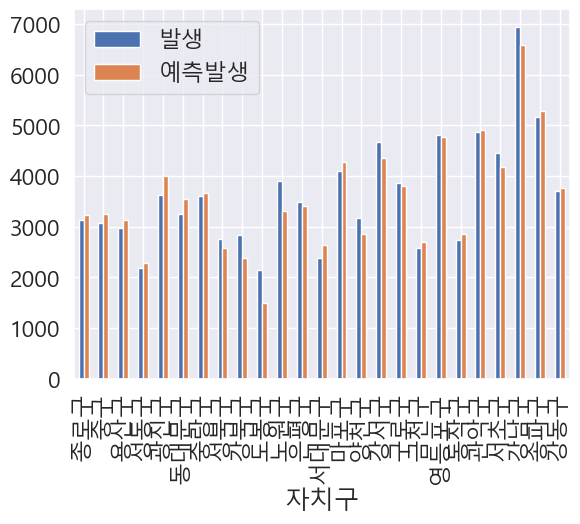

In [181]:
plt.figure(figsize=(10, 5))  
fin_aa.plot(x="자치구",y=["발생","예측발생"],kind="bar")
plt.show()

In [182]:
pred = fin_lr.predict(selected_x)
mae = mean_absolute_error(y, pred)
def calculate_rmse(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    return rmse

rmse = calculate_rmse(y,pred)
print("RMSE:", rmse)

RMSE: 281.6874630776339


In [183]:
mae

212.61185576628438

In [206]:
import statsmodels.api as sm

In [210]:
X = sm.add_constant(fin_x)
model = sm.OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     발생   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           3.49e-98
Time:                        17:10:29   Log-Likelihood:                -1673.3
No. Observations:                 225   AIC:                             3377.
Df Residuals:                     210   BIC:                             3428.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4230.6133     28.343    149.266      0.000    4174.740    4286.486
검거율         -247.9155     37.727     -6.571      0.000    -322.288    -173.543
cctv          43.8294     32.981      1.329      0.185     -21.186     108.845
인구           280.7788     46.456      6.044      0.000     189.199     372.359
경찰관          197.3913     51.066      3.865      0.000      96.724     298.058
행복지수          97.8258     39.346      2.486      0.014      20.261     175.390
월간 음주율        66.8091     44.592      1.498      0.136     -21.096     154.714
지가변동평균      -112.1556     32.763     -3.423      0.001    -176.742     -47.569
평균최고기온       185.6871     38.852      4.779      0.000     109.097     262.277
평균최저기온      -171.6818     45.937     -3.737      0.000    -262.239     -81.124
평균풍속         280.3272     40.177      6.977      0.000     201.125     359.529
강수량합           9.6711     41.746      0.232      0.817     -72.624      91.966
유흥주점         657.8189     48.318     13.614      0.000     562.569     753.068
외국인 인구       105.8581     32.833      3.224      0.001      41.134     170.582
평균연령        -388.7606     60.756     -6.399      0.000    -508.530    -268.992
==============================================================================
Omnibus:                       15.193   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.489
Skew:                           0.515   Prob(JB):                     9.67e-05
Kurtosis:                       3.955   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 번외) 콤비네이션을 통한 최적의 변수 조합

In [322]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# x: 전체 데이터셋, y: 종속 변수
# x: ...

# 최적의 변수 조합 및 점수 초기화
best_feature_combination = None
best_score = -1

# 가능한 모든 변수 조합을 시도
for r in range(1, 21):  # 1부터 20까지의 변수 조합 시도
    for subset in combinations(x.columns[:21], r):
        # 현재 조합에 해당하는 데이터 추출
        selected_features = x[list(subset)].copy()  # 수정된 부분
        
        # 데이터 분할
        x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=0)
        
        # 모델 훈련
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        
        # 모델 평가
        score = lr.score(x_test, y_test)
        
        # 최고 점수 및 조합 업데이트
        if score > best_score:
            best_score = score
            best_feature_combination = subset

print("Best Feature Combination:", best_feature_combination)
print("Best Score:", best_score)

Best Feature Combination: ('검거율', 'cctv', '인구', '경찰관', '행복지수', '월간 음주율', '지가변동평균', '평균최고기온', '평균최저기온', '평균풍속', '강수량합', '유흥주점', '외국인 인구', '평균연령')
Best Score: 0.9354710035995655


In [198]:
fin_x=scaled_aa_df[['검거율', 'cctv', '인구', '경찰관', '행복지수', '월간 음주율', '지가변동평균', '평균최고기온', '평균최저기온', '평균풍속', '강수량합', '유흥주점', '외국인 인구', '평균연령']]

In [199]:
x_fintrain,x_fintest,y_fintrain,y_fintest=train_test_split(fin_x,y,test_size=0.2,random_state=0)

In [201]:
fin_lr=LinearRegression()
fin_lr.fit(x_fintrain,y_fintrain)

LinearRegression()

In [202]:
fin_lr.score(x_fintest,y_fintest)

0.9354710035995657

In [203]:
fin_lr.score(x_fintrain,y_fintrain)

0.8947838032617299

C:\Users\potte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


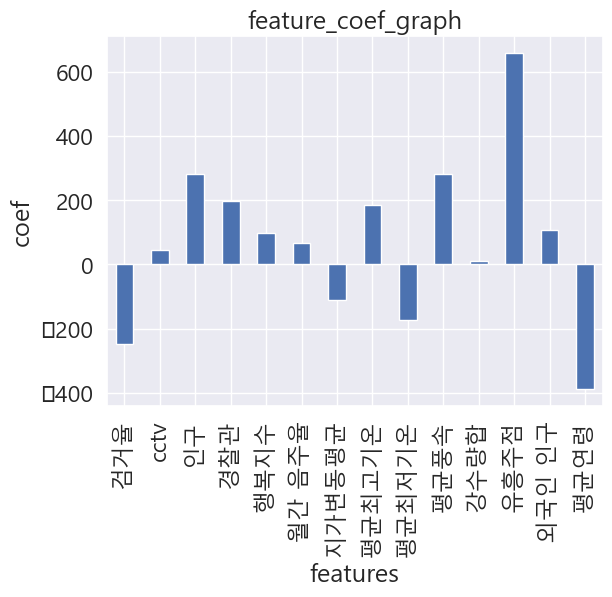

In [211]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs= model.params.tolist()
coefs_se=pd.Series(coefs)

# 변수명을 리스트로 변환
X_labels= model.params.index.tolist()

# X의 1번째 컬럼부터 20번째 컬럼까지만 선택
selected_coefs_se = coefs_se[1:17]

ax = selected_coefs_se.plot(kind="bar")

ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(X_labels[1:17])  # X의 1번째 컬럼부터 20번째 컬럼까지만 라벨 설정

plt.show()
